In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from plotly.offline import init_notebook_mode,iplot,download_plotlyjs,plot
# init_notebook_mode(connected=True)
from matplotlib.pylab import rcParams
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [71]:
# Chi-square test dari variabel kategorikal terhadap variabel respon
def chi_square_test(dfa, var1, var2) :
    # Membuat contingency table
    df = pd.crosstab(dfa[var1], dfa[var2], margins=False)

    # Menghitung nilai statistiknya
    from scipy.stats import chi2_contingency, chi2
    stat, p, dof, expected = chi2_contingency(observed=df
                                         ,correction=True #Jika dof=1, maka digunakan Yates Correction (?)
                                         ,lambda_=None #Untuk mengganti Pearson Chi-Square menjadi Cressie-Read Divergence)
                                          )

    # Interpretasi nilai statistik
    prob = 0.95
    critical = chi2.ppf(prob, dof)

    if abs(stat) >= critical:
        print(var1,': Dependent')
    else:
        print(var1,': Independent')   

In [72]:
def count_pcg_plot(df, var, target, ax, bar_color, line_color, text_size, y2_label, adjust_height=1000) :

    # Bikin countplotnya
    ax = sns.countplot(data=df, x=var, color=bar_color, order=df[var].sort_values().unique())
    ax.set_title('Information of '+var, fontsize=20, fontname='Monospace', fontweight="bold")

    # Buat jadi dua y-axis
    ax2 = ax.twinx()

    # Hitung persentase target tiap value di variabel
    tmp = pd.crosstab(df[var], df[target], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'No',1:'Yes'}, inplace=True)

    # Buat lineplotnya
    ax2 = sns.pointplot(x=var, y='Yes', data=tmp
                     ,order=list(tmp[var].values)
                     ,color=line_color, legend=False, scale=0.5)
    ax2.set_ylabel(y2_label, fontname='Monospace')

    # Kosmetiknya
    total = len(df)
    height_plus = 0.01*total
    sizes = []
    for p in ax.patches :
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2., height + adjust_height,
              '{:1.2f}%'.format(height/total*100),
              ha="center", fontsize=text_size, fontname='Monospace')
    ax.set_ylim(0, max(sizes)*1.2) ;

In [73]:
train = pd.read_csv('train.csv')

In [74]:
test = pd.read_csv('test.csv')

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

In [76]:
train.dropna(inplace=True)

In [77]:
test.isna().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
dtype: int64

# Balance / Imbalance Dataset

Text(0.5, 1.0, 'Ratio of Best Performance')

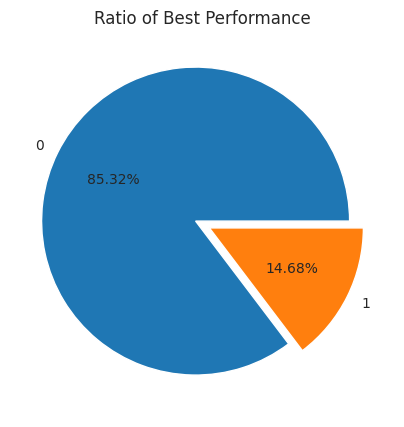

In [78]:
plt.figure(figsize=(12,5))
plt.pie(
    x=train['Best Performance'].value_counts(),
    explode=[0.05]*2,
    autopct="%.2f%%",
    labels=['0','1']
    )
plt.title('Ratio of Best Performance')


this means imbalance dataset

# Categorical Feature

In [79]:
# marital_status_maried nominal
category_f=[f for f in train.columns if train[f].dtypes=='O']
category_f

['job_level',
 'person_level',
 'Employee_type',
 'marital_status_maried(Y/N)',
 'Education_level']

## Countplot

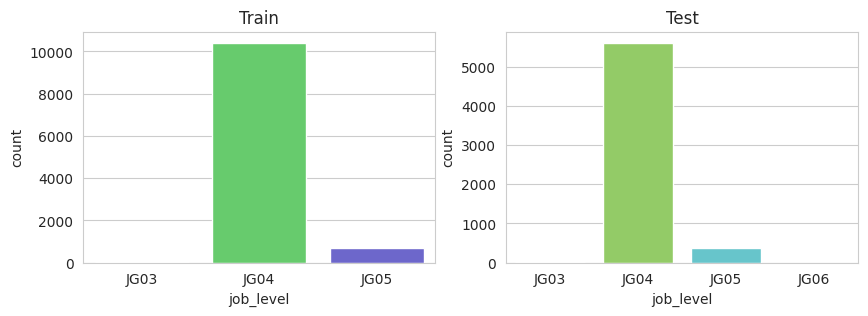

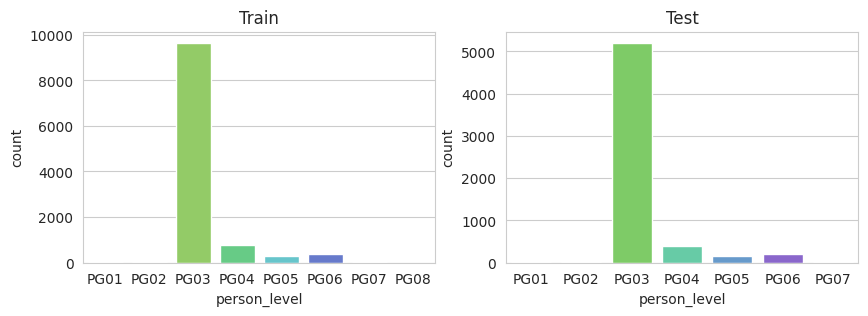

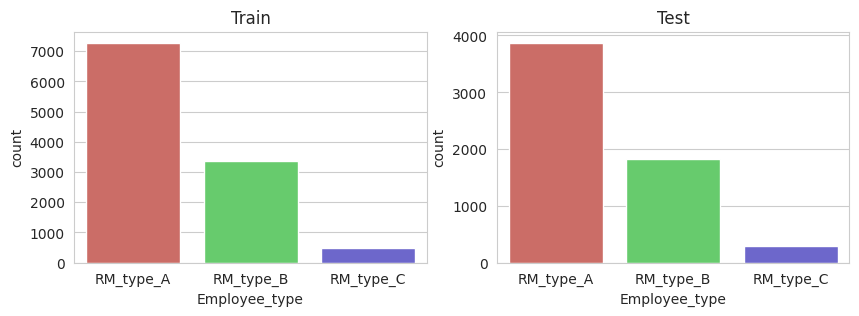

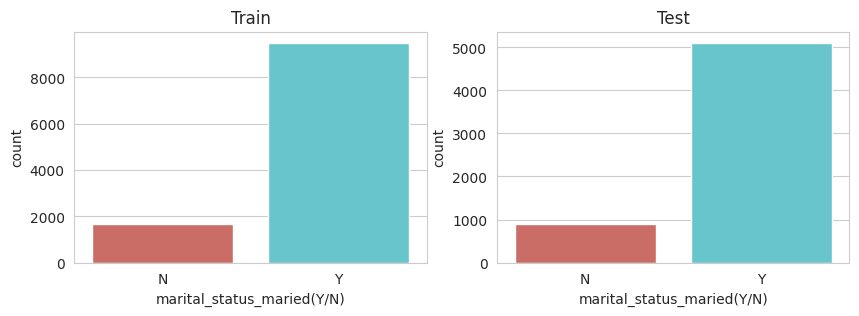

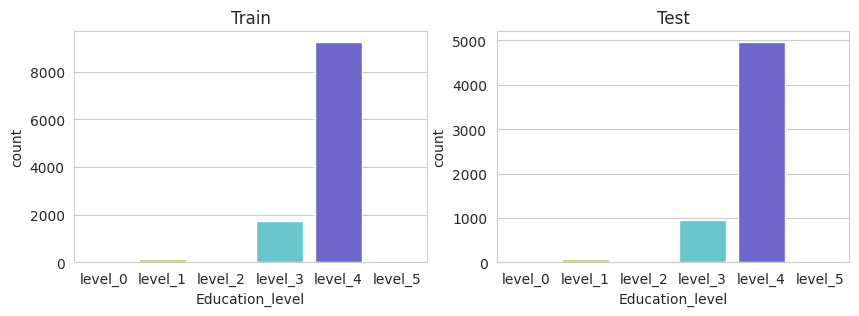

In [80]:
for f in category_f:
  data = train.copy()
  data_t = test.copy()
  fig, ax = plt.subplots(1,2,figsize=(10,3))
  sns.countplot(data[f],ax=ax[0],palette='hls',order=list(data[f].sort_values().unique()))
  sns.countplot(data_t[f],ax=ax[1],palette='hls',order=list(data_t[f].sort_values().unique()))
  ax[0].set_title('Train')
  ax[1].set_title('Test')
  plt.show()

there are several categories in the train data but not in the test data, and vice versa. maybe we can change some categories with 'Rare_var'

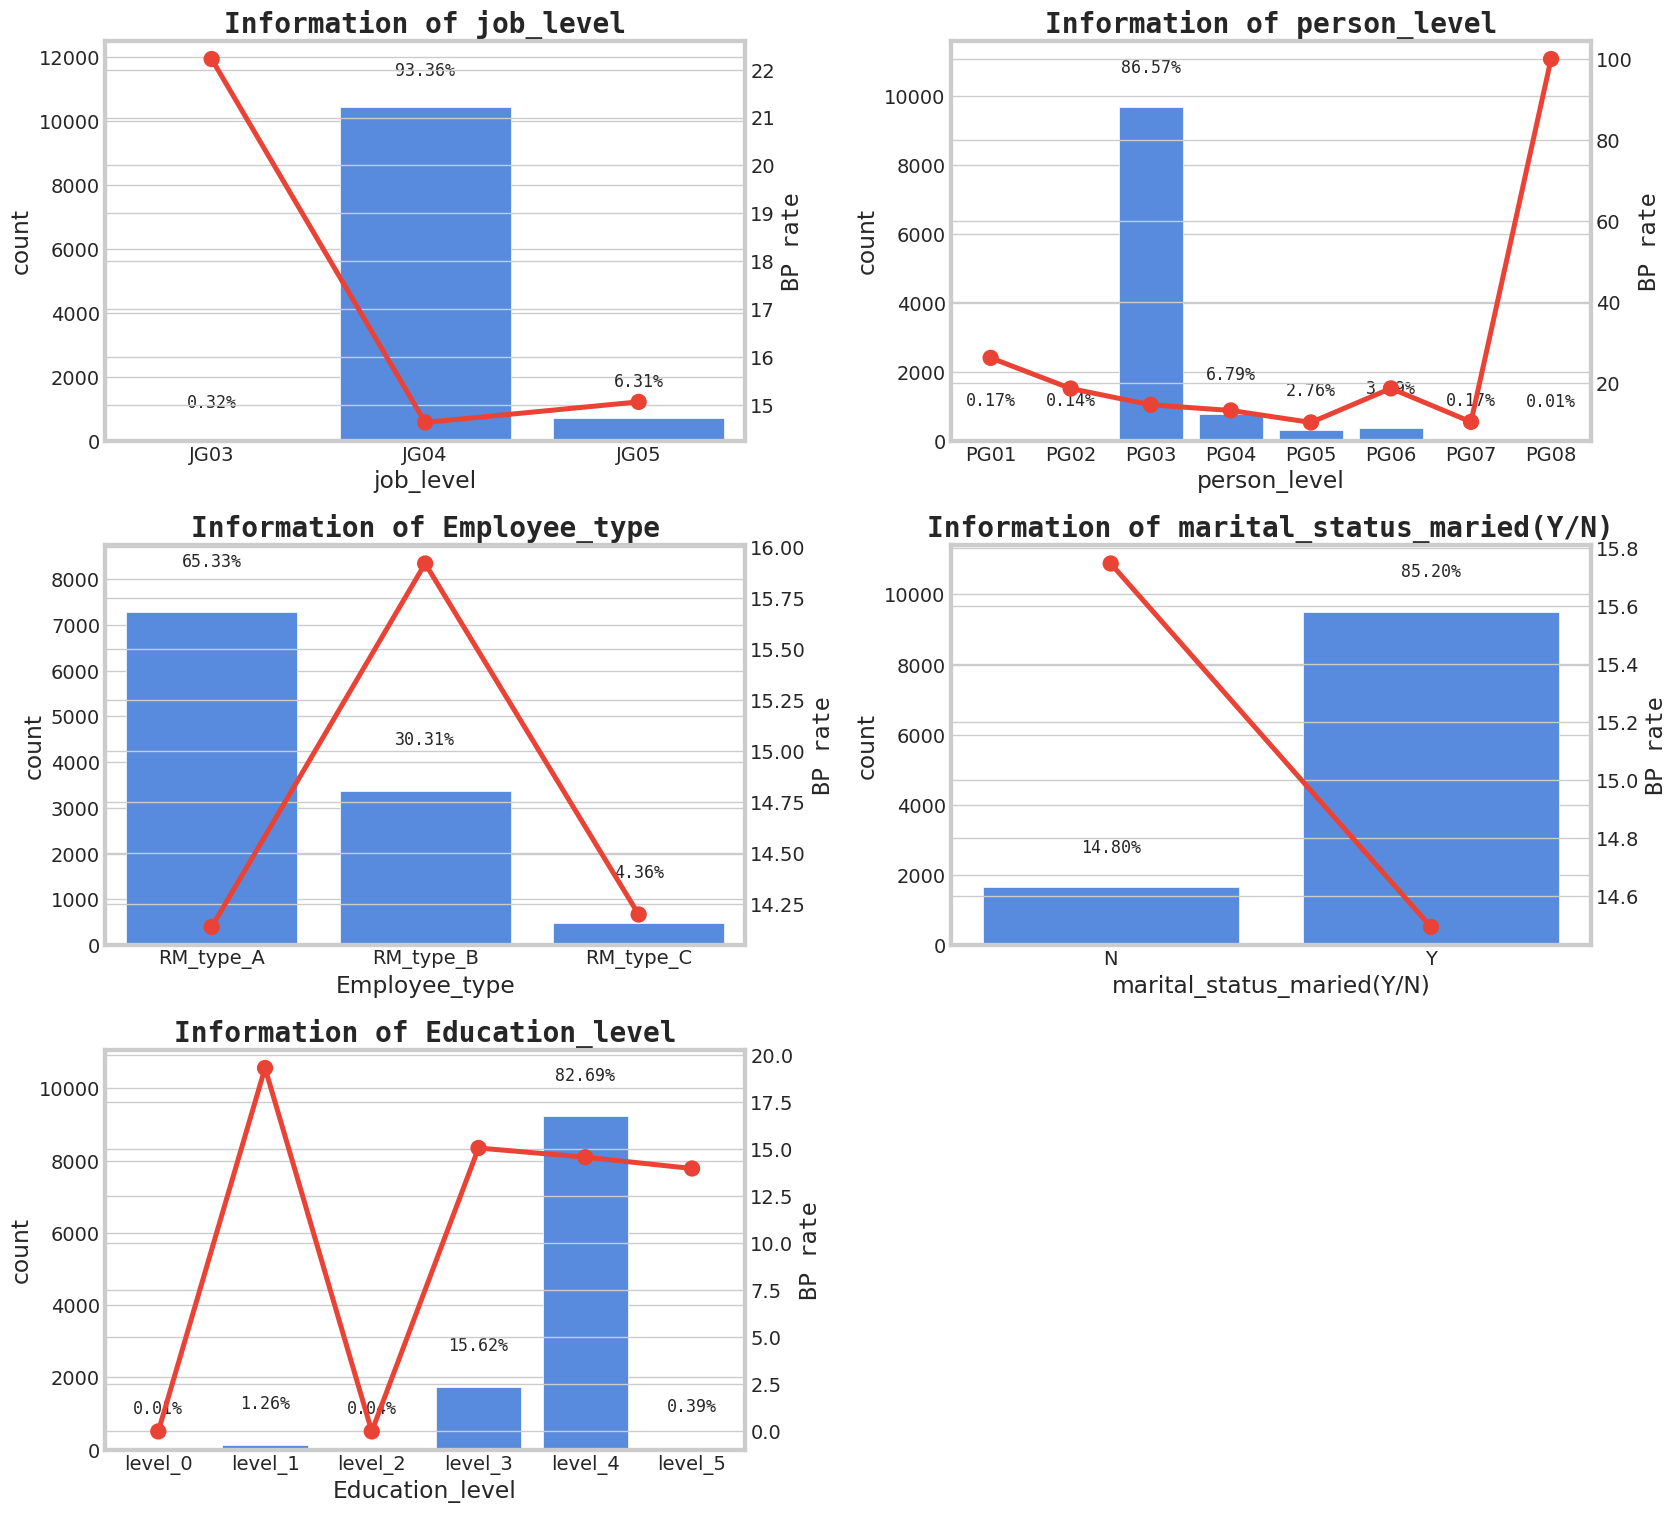

In [81]:
### Check the distribution of attr var
rcParams['figure.figsize'] = [17,35]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = gridspec.GridSpec(7,2)

# Dataset prep
df_plot = train.copy()

# Plot prep
line_color = '#EA4335'
bar_color = '#4285F4'
text_size = 12
y2_label = 'BP rate'

# Plot
for i,var in enumerate(category_f) :
    ax = plt.subplot(grid[i])
    count_pcg_plot(df_plot, var, 'Best Performance', ax, bar_color, line_color, text_size, y2_label)
    
plt.tight_layout()

- job_level = JG03 has the highest value of BP(Best Performance) Rate
- Person level = PG08 has 100% BP Rate, but in test dataset there isn't PG08
- Employee type = RM_type_B has the highest BP Rate
- marital_status_maried(Y/N) = unmarried people have a higher BP rate
- Education_level = level_1 has the highest rate

Also from the plot, this means all categorical feature are nominal. we can convert all categorical values to dummy variable

In [82]:
# for feat in category_f:
#   temp = df_plot.groupby(feat)['Best Performance'].count()/len(df_plot)
#   temp_df = temp[temp>0.01].index
#   df_plot[feat] = np.where(df_plot[feat].isin(temp_df),df_plot[feat],'Rare_var')

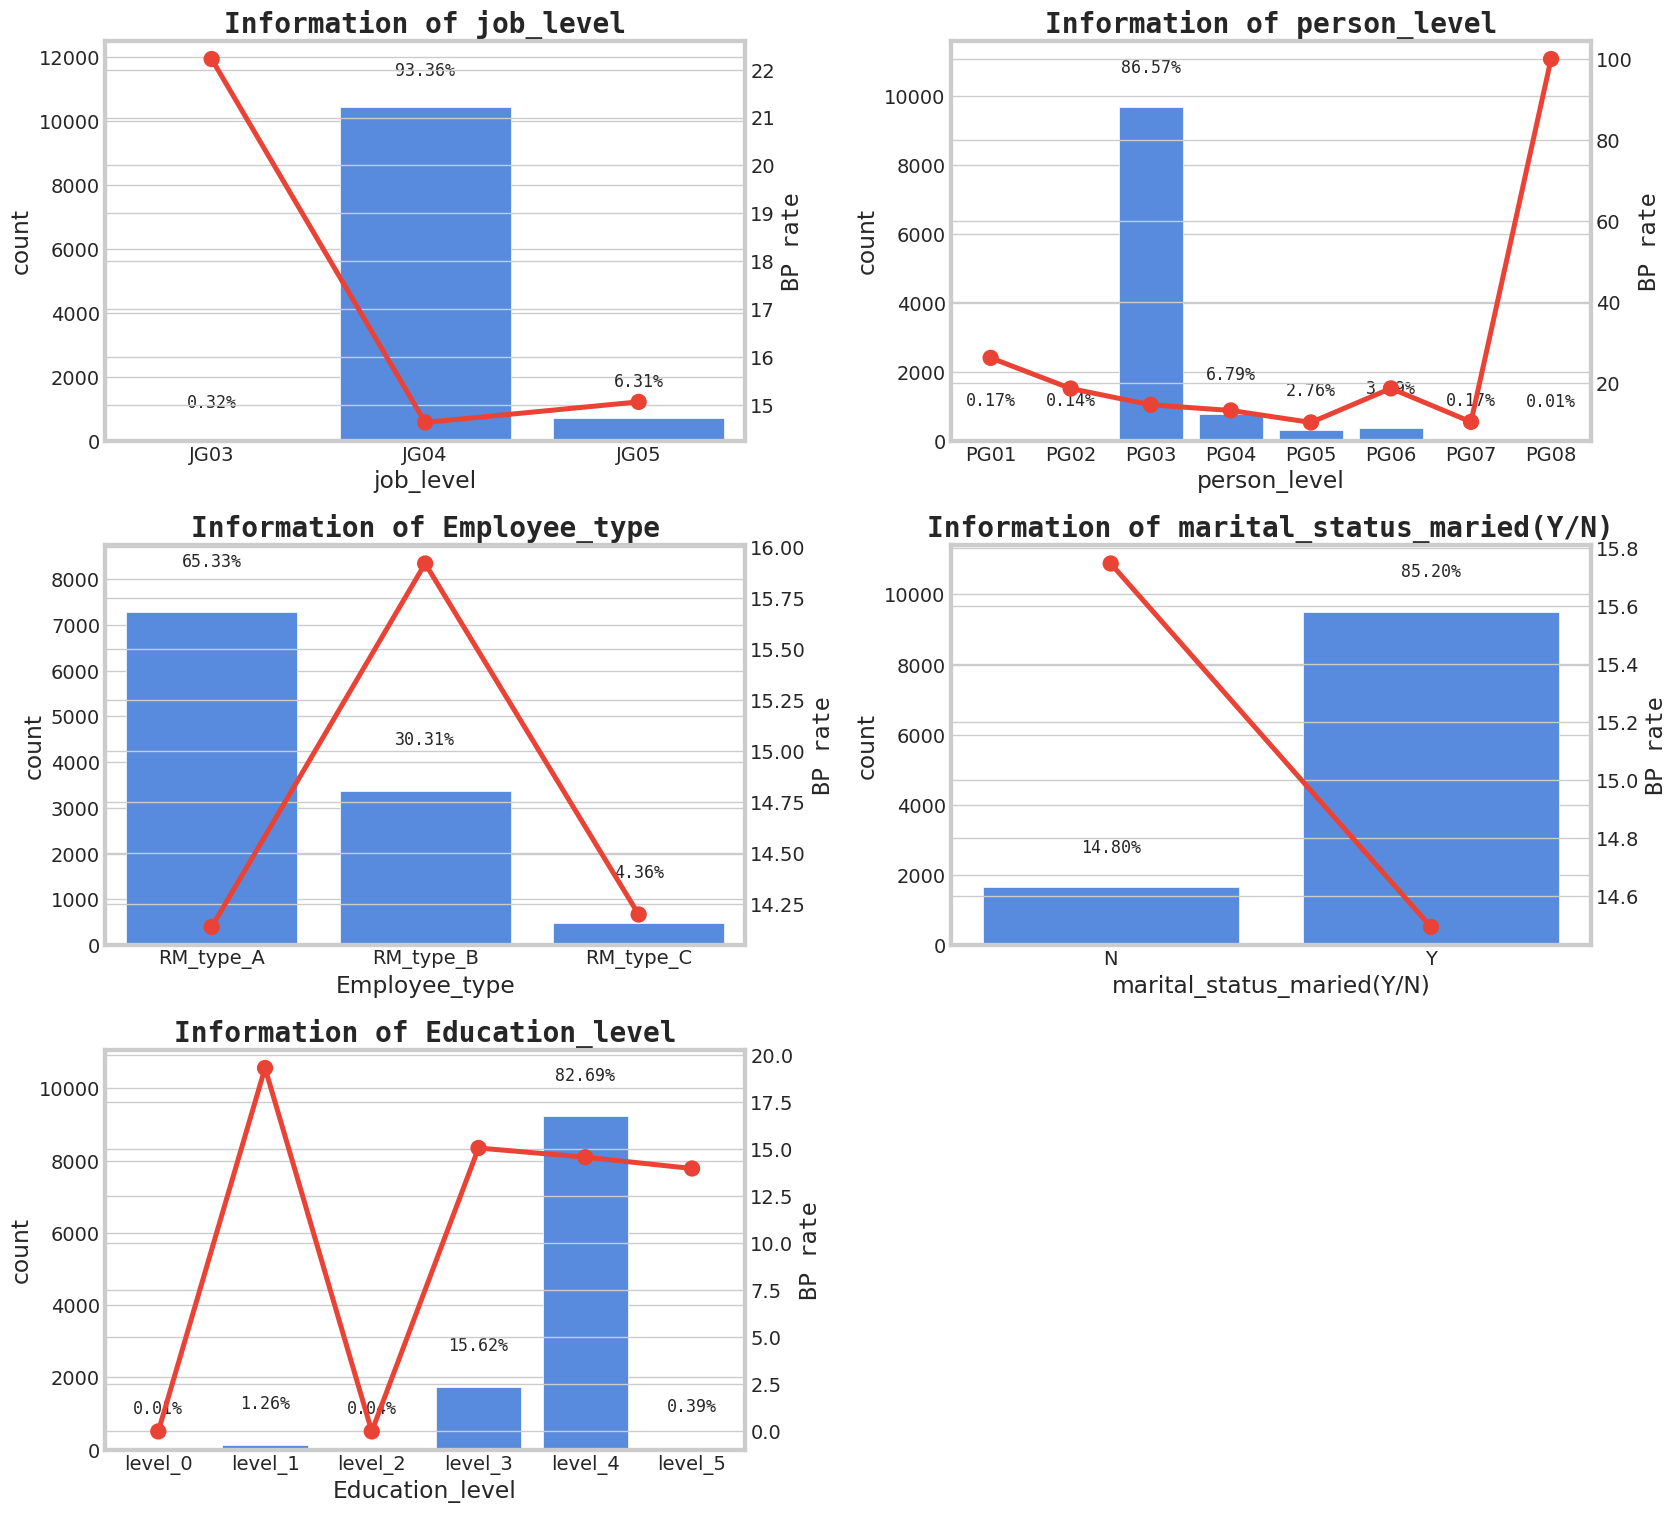

In [83]:
rcParams['figure.figsize'] = [17,35]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = gridspec.GridSpec(7,2)

# Dataset prep

# Plot prep
line_color = '#EA4335'
bar_color = '#4285F4'
text_size = 12
y2_label = 'BP rate'

# Plot
for i,var in enumerate(category_f) :
    ax = plt.subplot(grid[i])
    count_pcg_plot(df_plot, var, 'Best Performance', ax, bar_color, line_color, text_size, y2_label)
    
plt.tight_layout()

In [84]:
# jl = ['JG04','JG05']
# pl = ['PG03','PG04','PG05','PG06']
# el = ['level_1','level_3','level_4']
# test['job_level']= test['job_level'].apply(lambda x: x if x in jl else 'Rare_var')
# test['person_level']=test['person_level'].apply(lambda x:x if x in pl else 'Rare_var')
# test['Education_level']=test['Education_level'].apply(lambda x:x if x in el else 'Rare_var')

## Rasio marital status maried di train dan test

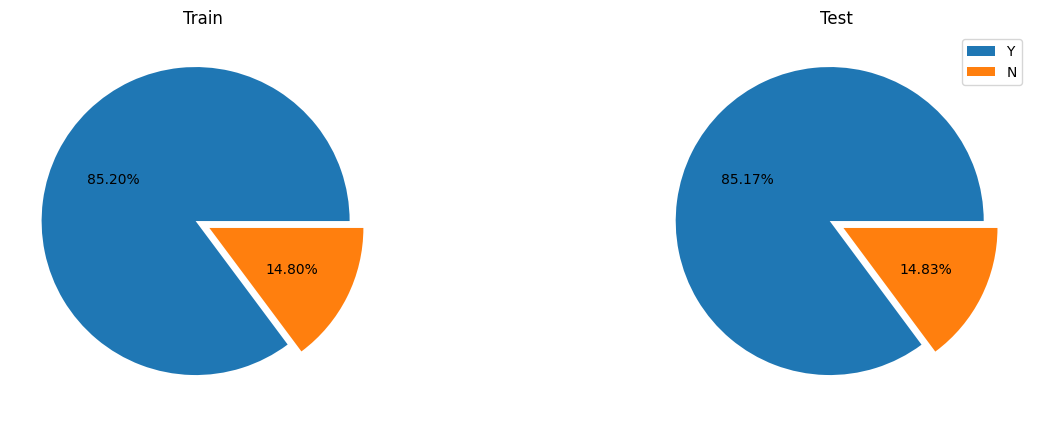

In [85]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].pie(
    x=train['marital_status_maried(Y/N)'].value_counts(),
    explode=[0.05]*2,
    autopct="%.2f%%"
    )
axes[0].set_title('Train')
axes[1].pie(
    x=test['marital_status_maried(Y/N)'].value_counts(),
    explode=[0.05]*2,
    autopct="%.2f%%",
    )
axes[1].set_title('Test')
plt.legend(['Y','N'])

## Check Employee Type

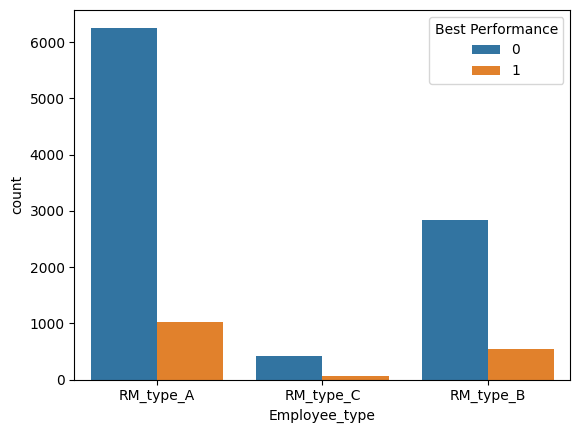

In [86]:
sns.countplot(x='Employee_type',data=train,hue='Best Performance')

# Numerical Features

In [87]:
numerical_f = [f for f in train.columns if train[f].dtypes != 'O']

In [88]:
numerical_f

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'gender',
 'age',
 'number_of_dependences',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'sick_leaves',
 'Last_achievement_%',
 'Achievement_above_100%_during3quartal',
 'Best Performance']

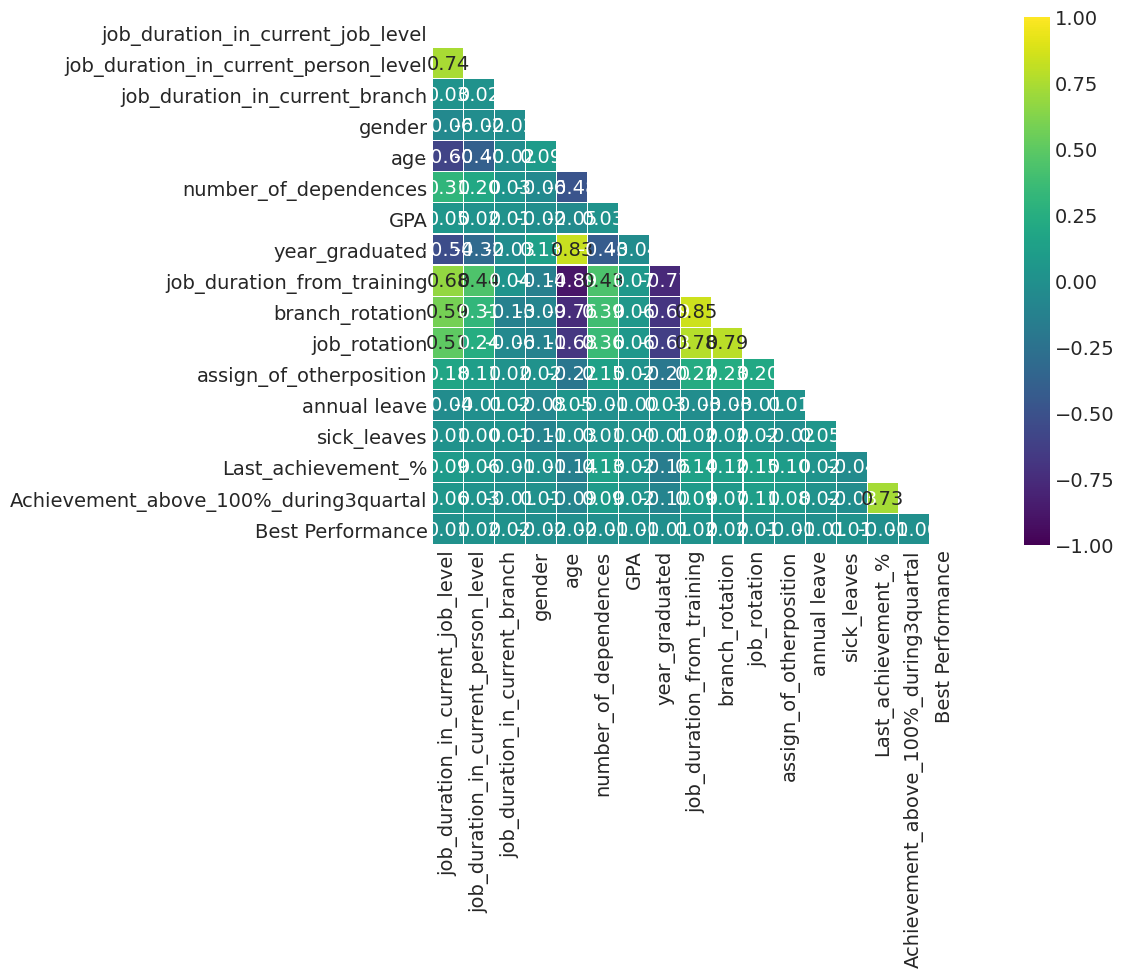

In [89]:
rcParams['figure.figsize'] = [15,10]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')

mask = np.zeros_like(train[numerical_f].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train[numerical_f].corr(), square =True, vmin=-1, vmax=1, linewidths=0.1, annot=True, fmt='.2f', mask=mask, cmap='viridis')
plt.tight_layout()

## Discrete feature

In [90]:
discrete_f = [f for f in numerical_f if train[f].nunique() < 28 and f!='Best Performance']
discrete_f

['gender',
 'number_of_dependences',
 'branch_rotation',
 'job_rotation',
 'assign_of_otherposition',
 'annual leave',
 'Achievement_above_100%_during3quartal']

In [91]:
for f in discrete_f:
  print('{} has {} types'.format(f,train[f].nunique()))

gender has 2 types
number_of_dependences has 7 types
branch_rotation has 19 types
job_rotation has 15 types
assign_of_otherposition has 26 types
annual leave has 21 types
Achievement_above_100%_during3quartal has 4 types


assign_of_otherpostion and annual_leave has Null value in test dataset, we need to impute it.

In [92]:
train[discrete_f].describe()

,gender,number_of_dependences,branch_rotation,job_rotation,assign_of_otherposition,annual leave,Achievement_above_100%_during3quartal
count,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000
mean,1.735653,0.995606,3.720140,3.505560,1.202834,3.664455,0.679071
std,0.441005,0.881092,2.399174,1.818055,2.575228,2.652647,1.107381
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,2.000000,1.000000,3.000000,3.000000,0.000000,3.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,1.000000,5.000000,1.000000
max,2.000000,7.000000,22.000000,15.000000,29.000000,21.000000,3.000000


### Heatmap correlation

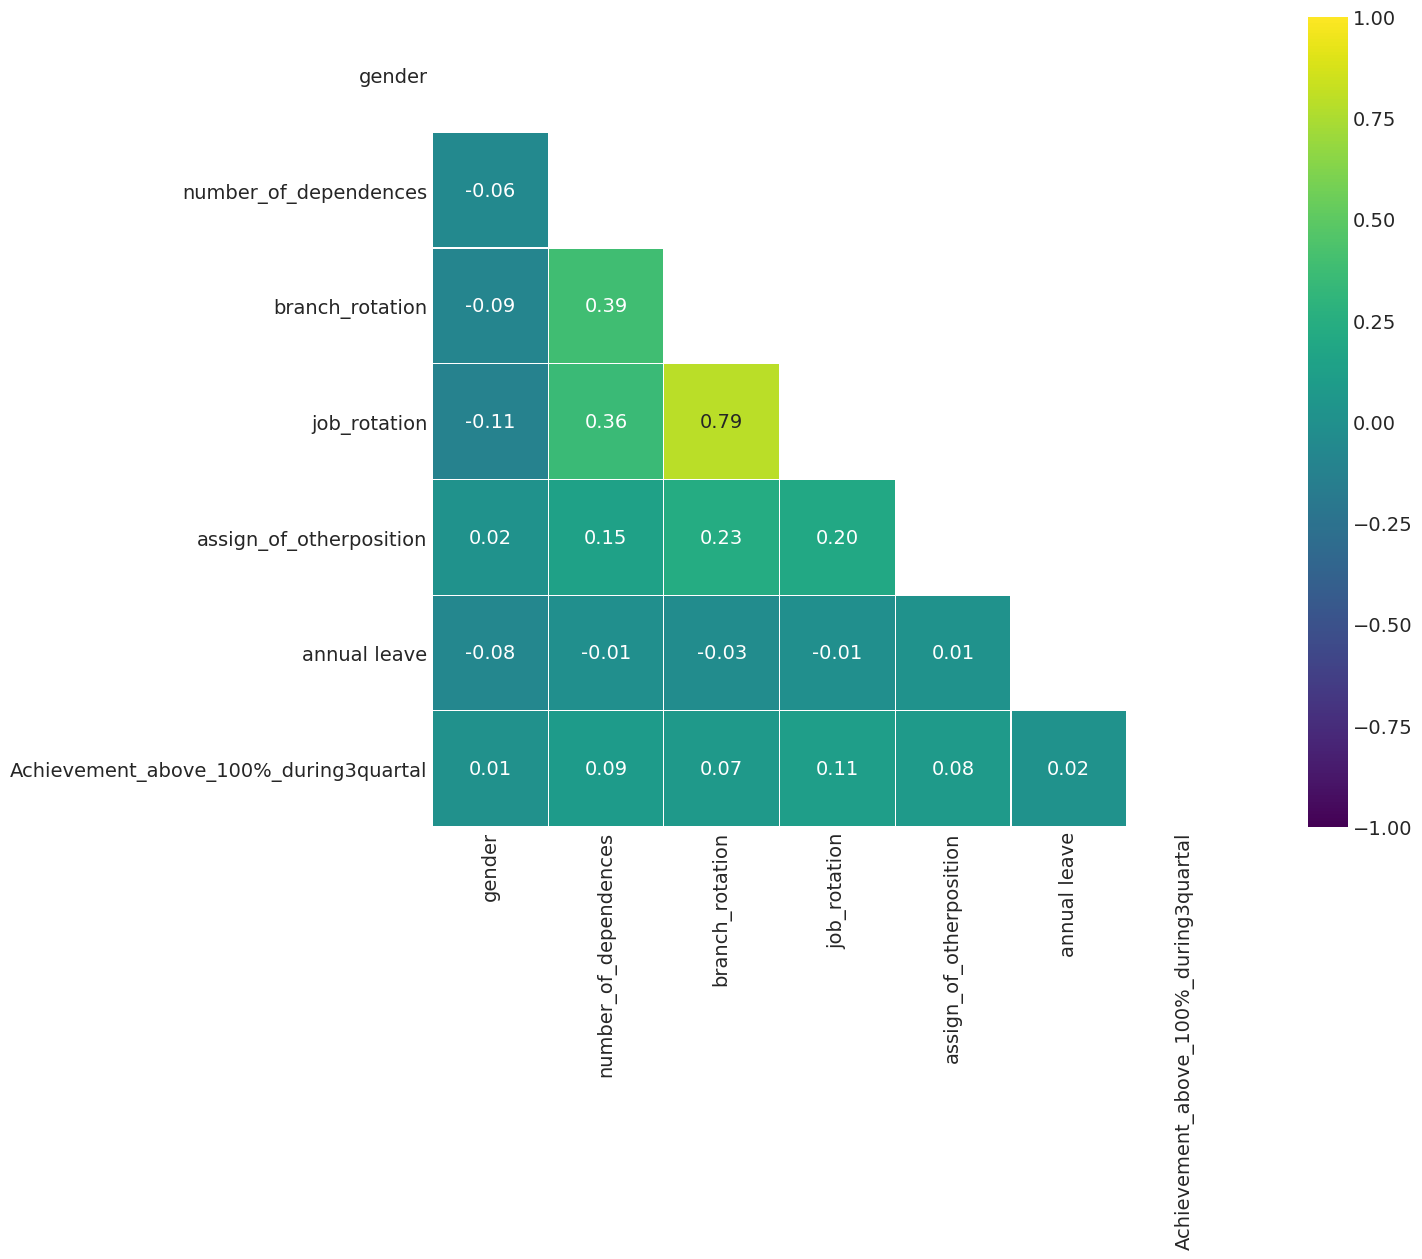

In [93]:
rcParams['figure.figsize'] = [15,10]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')

mask = np.zeros_like(train[discrete_f].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train[discrete_f].corr(), square =True, vmin=-1, vmax=1, linewidths=0.1, annot=True, fmt='.2f', mask=mask, cmap='viridis')

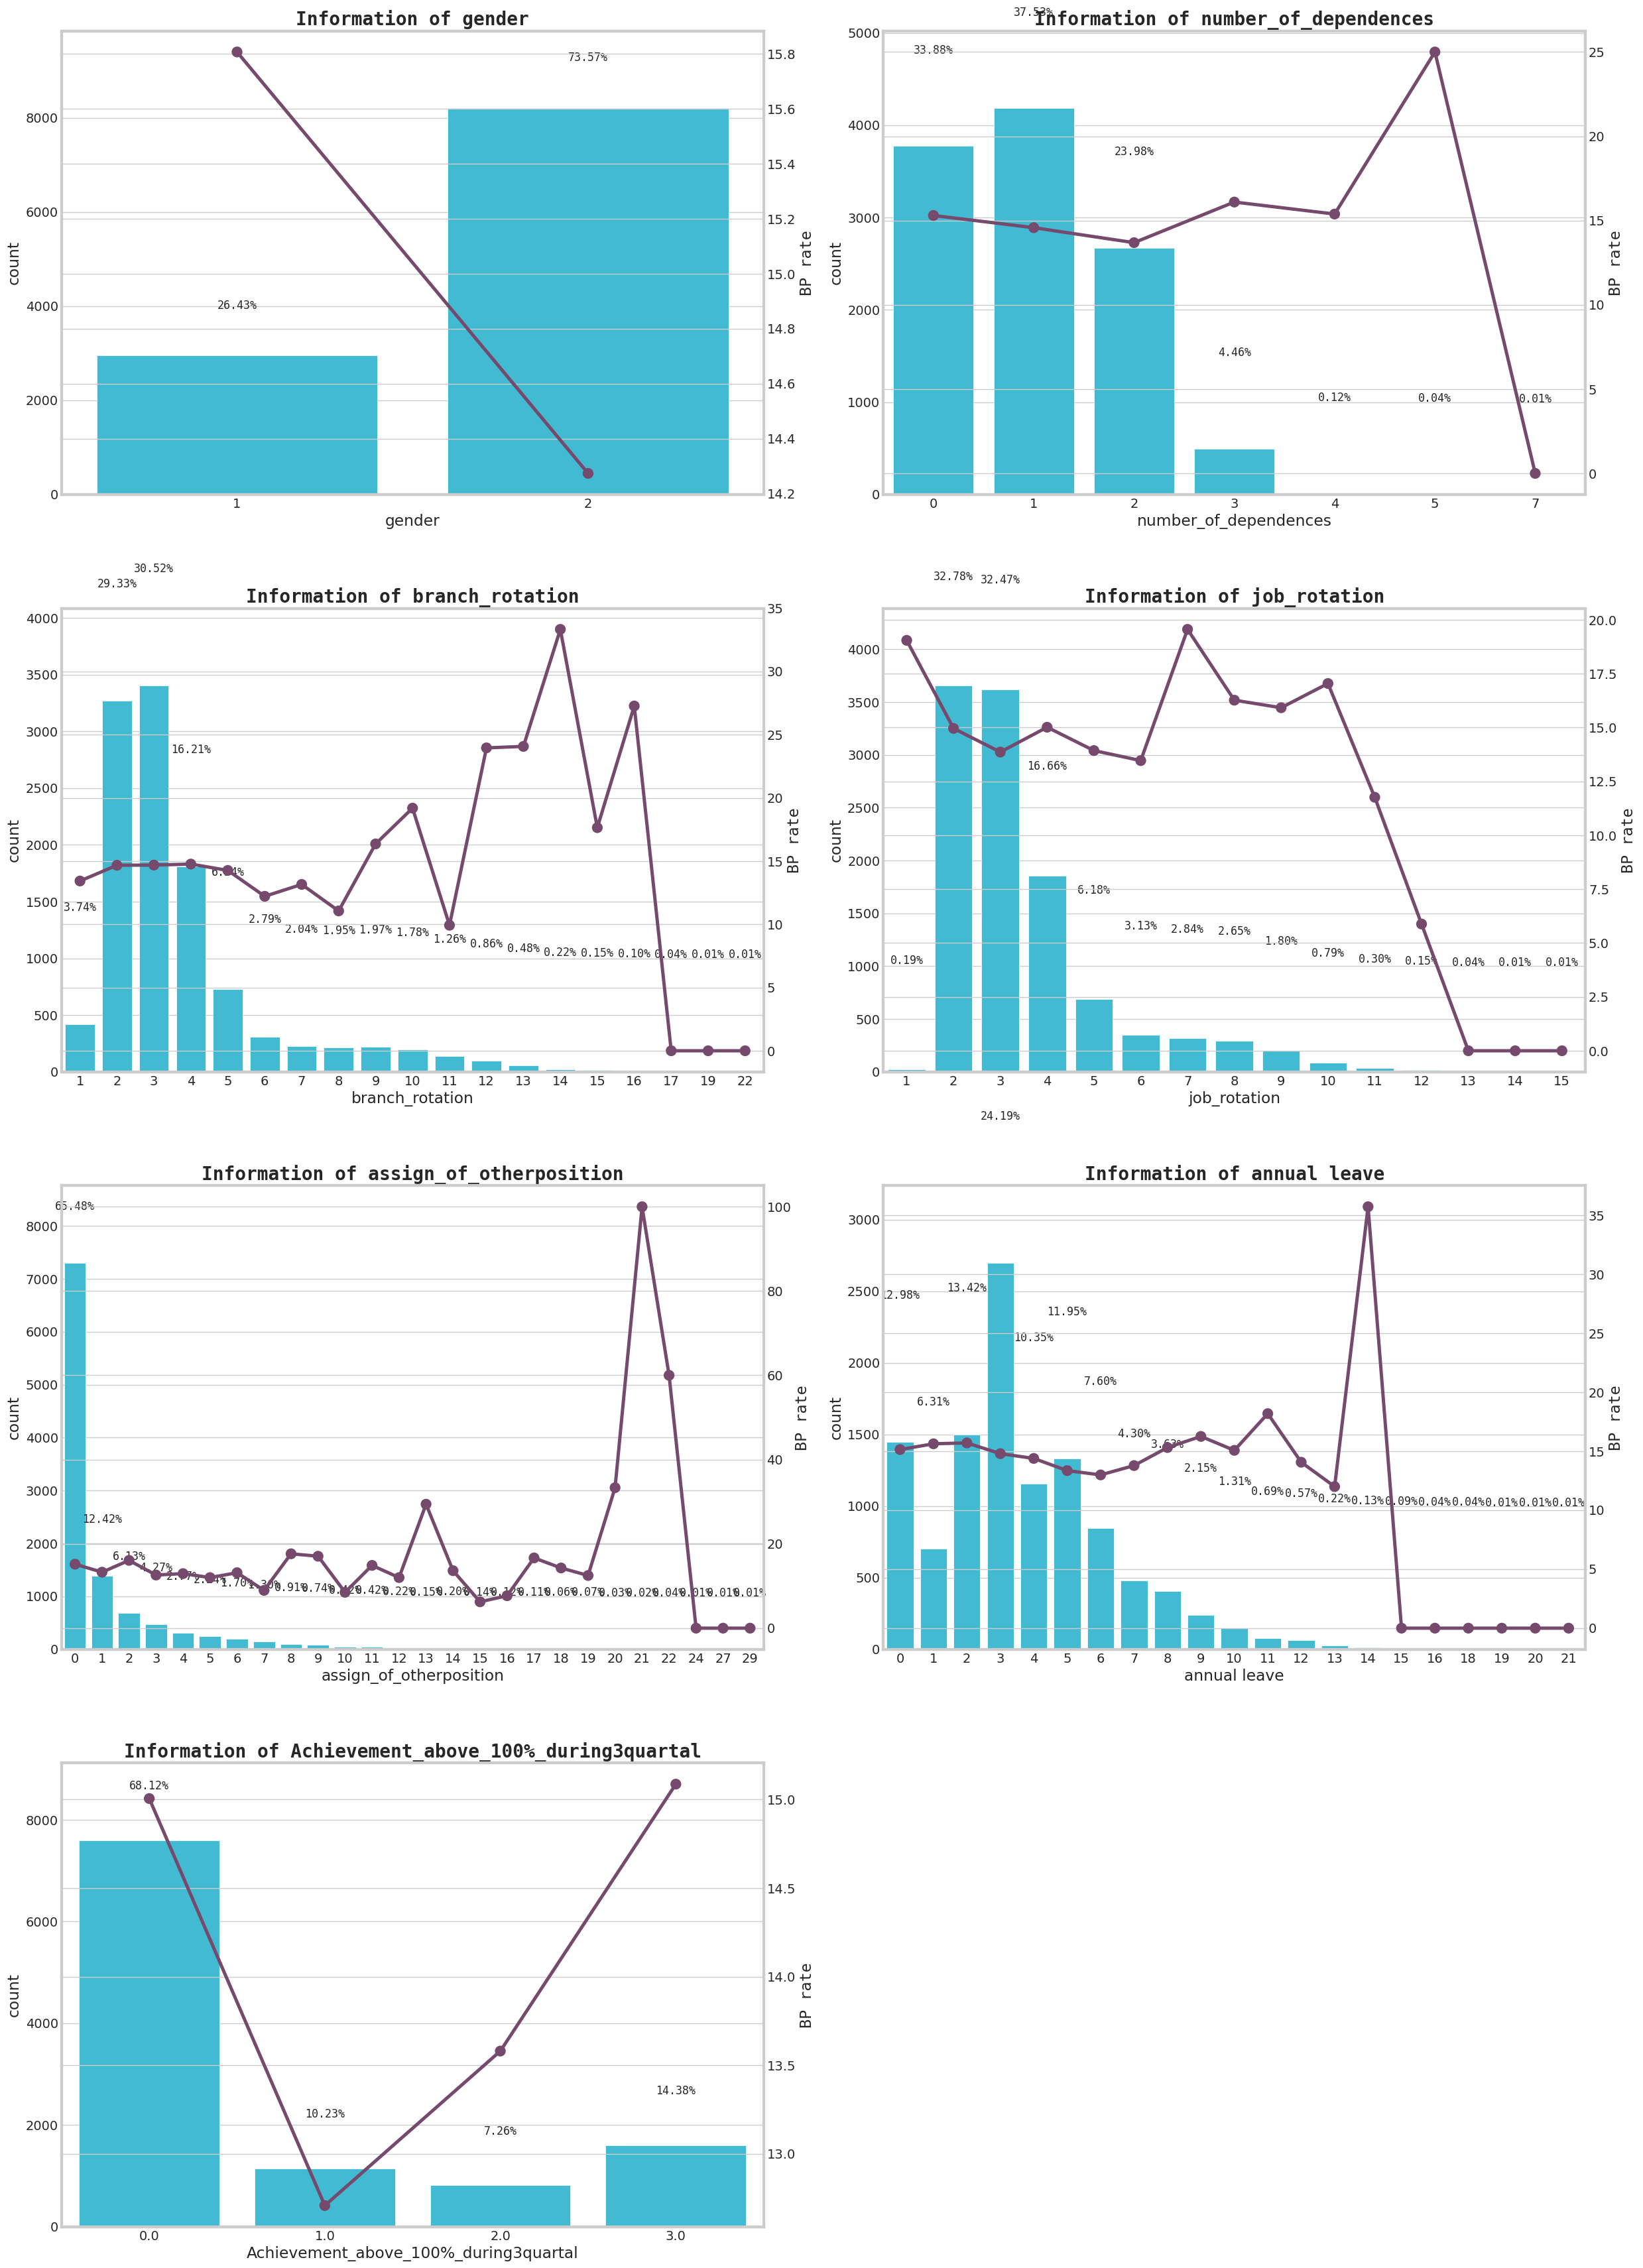

In [94]:
### Check the distribution of attr var
rcParams['figure.figsize'] = [25,60]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')
grid = gridspec.GridSpec(len(discrete_f),2)

# Dataset prep
# df_plot = train.copy()

# Plot prep
line_color = '#754a6c'
bar_color = '#2acaea'
text_size = 12
y2_label = 'BP rate'

# Plot
for i,var in enumerate(discrete_f) :
    ax = plt.subplot(grid[i])
    count_pcg_plot(train, var, 'Best Performance', ax, bar_color, line_color, text_size, y2_label)
    
plt.tight_layout()

- gender = gender 1 has higher rate
- assign_of_otherposition = when the assign_of_otherposition is 21, it has 100% BP Rate
the ordinal doesn't real because all feature aren't linear except gender feature.all this feature is nominal

### Job rotation vs Branch Rotation

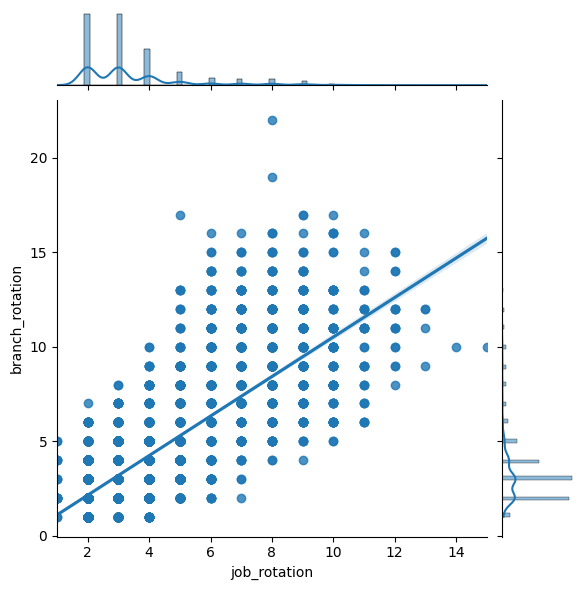

In [95]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.jointplot(x='job_rotation',y='branch_rotation',data=train,kind='reg')

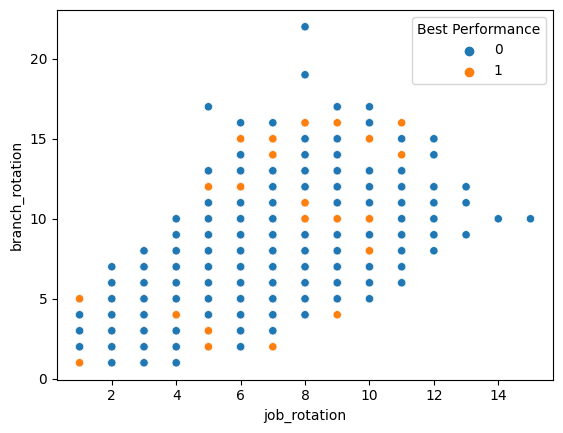

In [96]:
sns.scatterplot(x='job_rotation',y='branch_rotation',data=train,hue='Best Performance')

The conclusion above is that the higher the rotation to move positions the higher the work unit is also moved but it does not determine if he is the best performance.

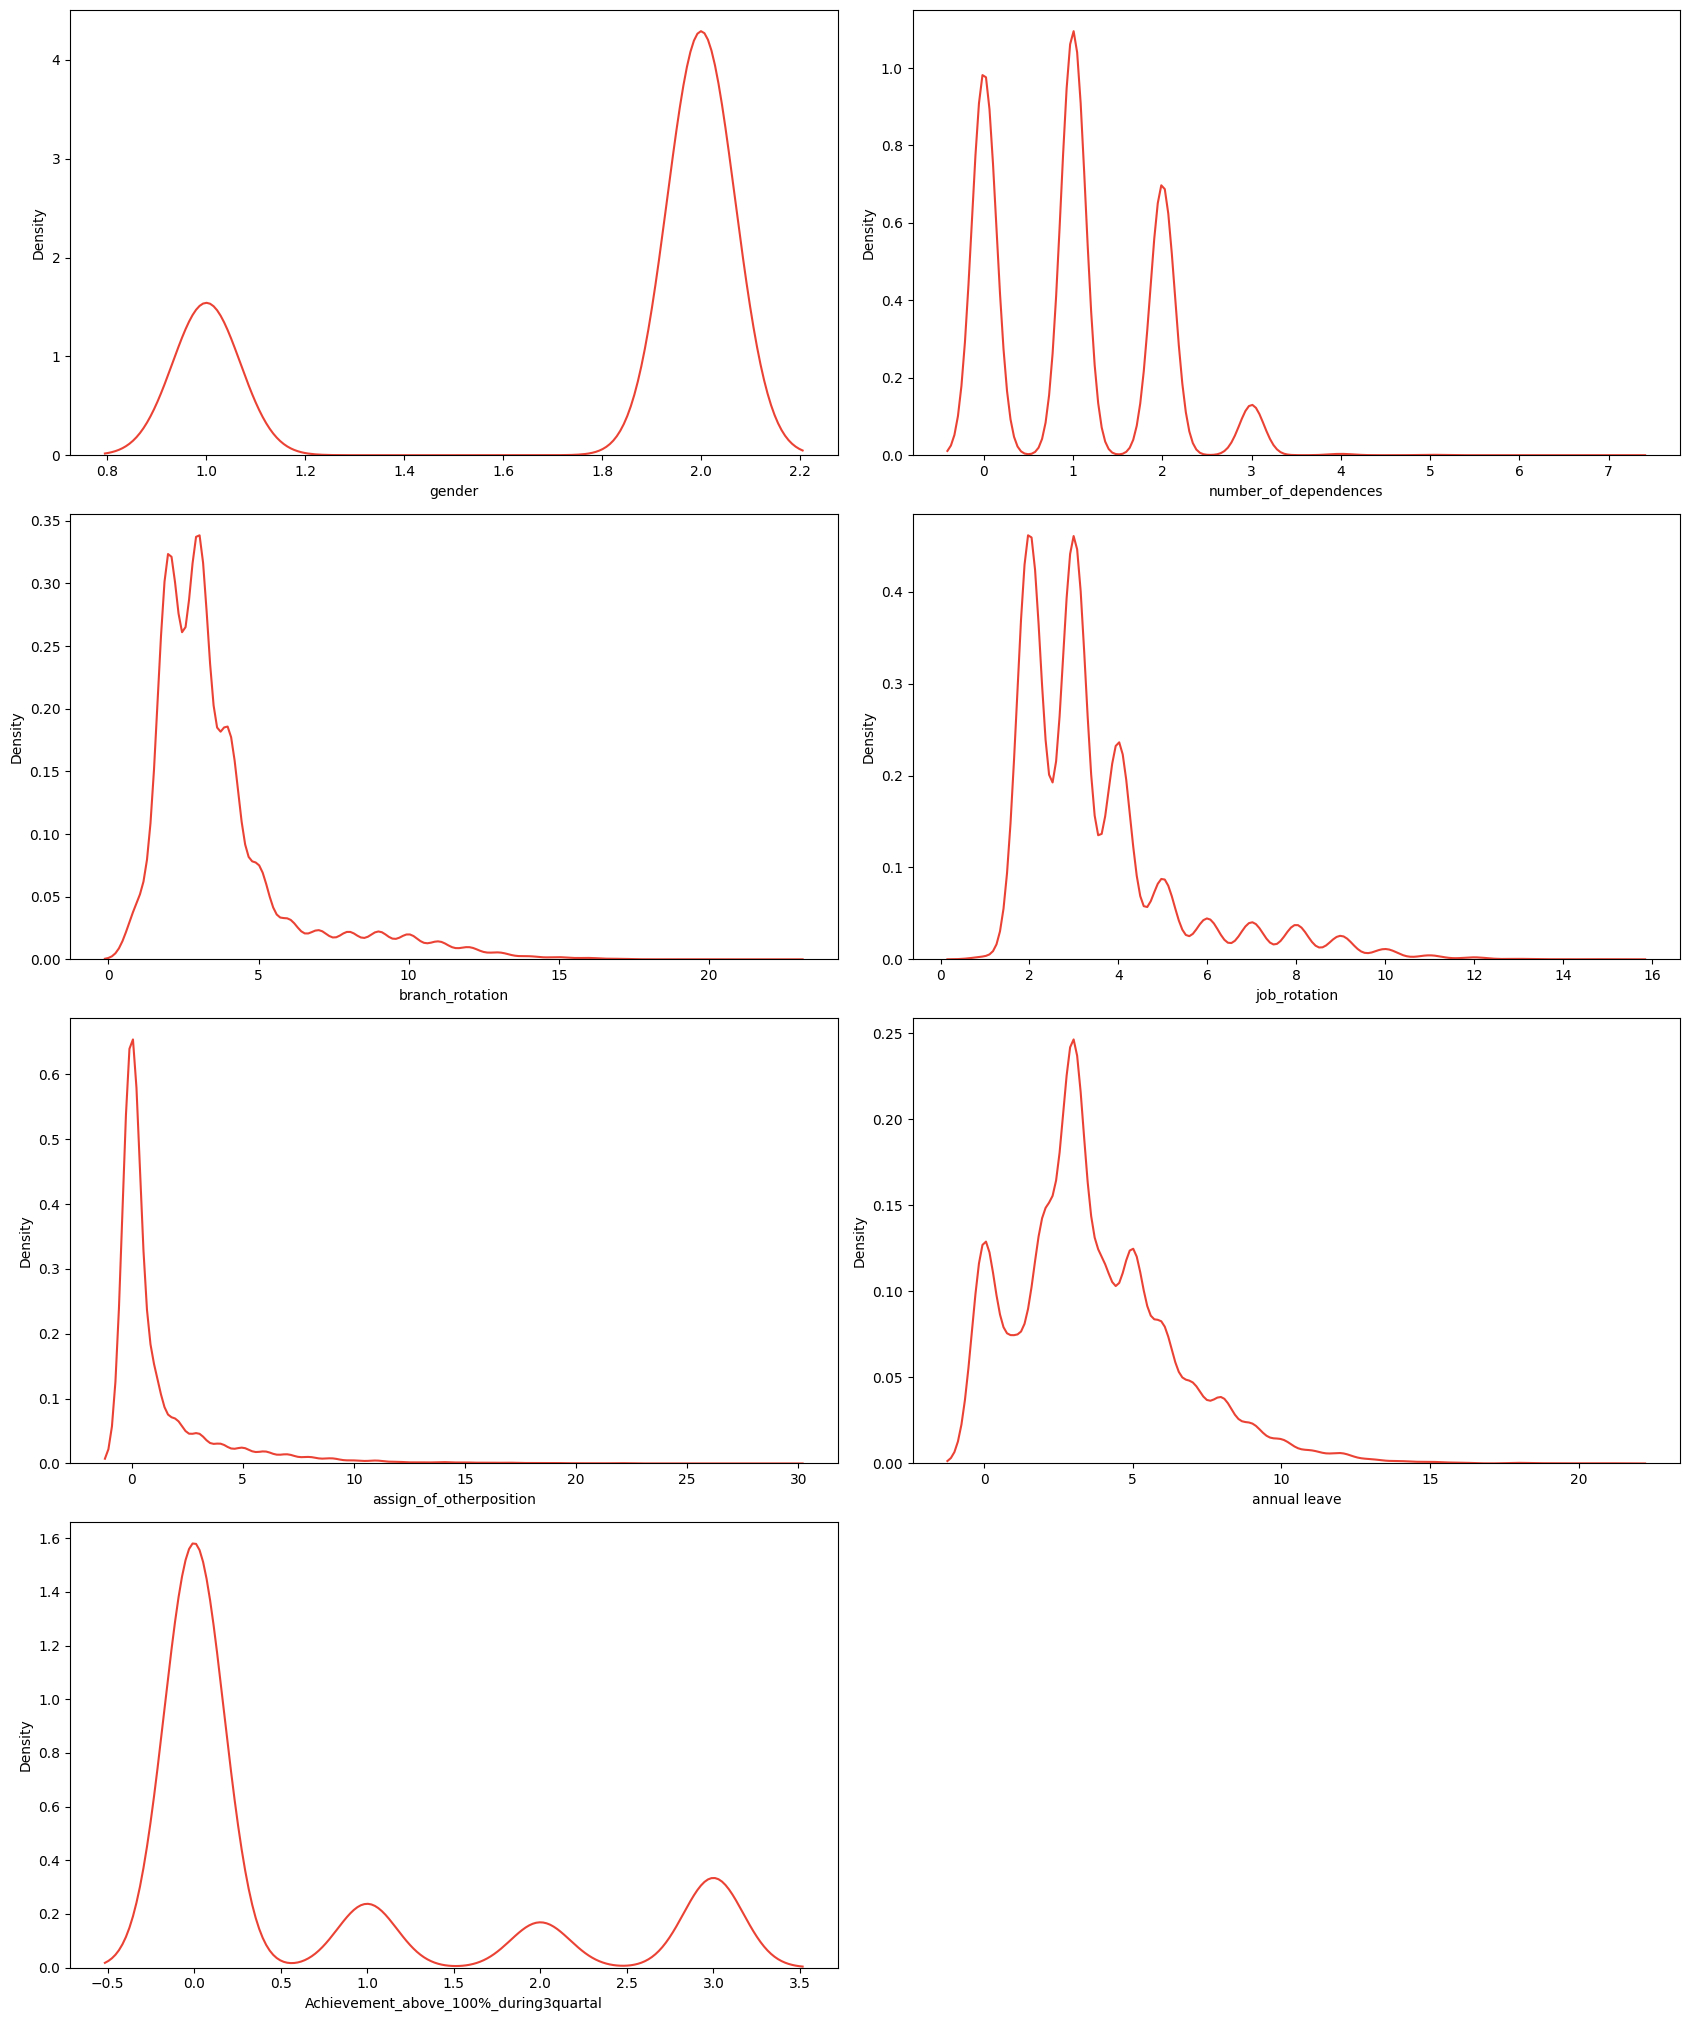

In [97]:
rcParams['figure.figsize']=[17,35]
grid = gridspec.GridSpec(len(discrete_f),2)


for i,var in enumerate(discrete_f):
  ax=plt.subplot(grid[i])
  sns.distplot(train[var], color='#EA4335',ax=ax, hist=False,)
  # sns.distplot(test[var], color='#4285F4',ax=ax, hist=False,)
  # plt.legend(['Train','Test'])
plt.tight_layout()

### Gender

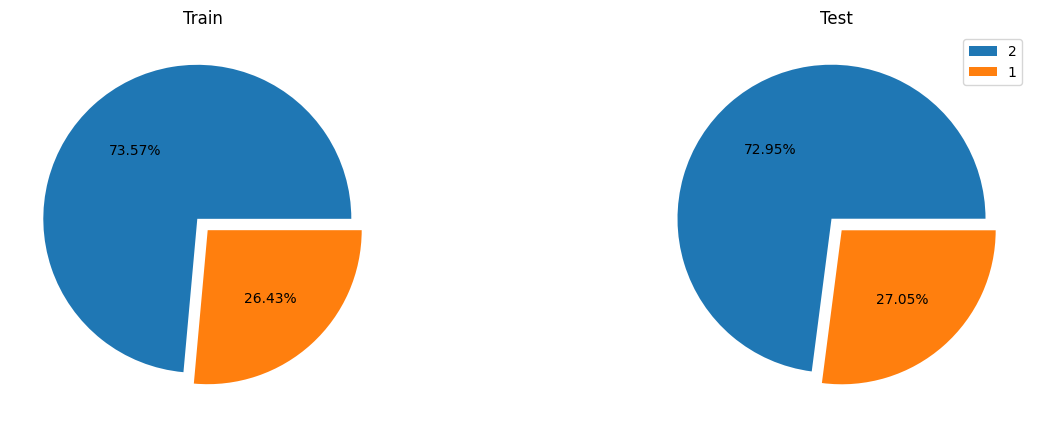

In [98]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].pie(
    x=train['gender'].value_counts(),
    explode=[0.05]*2,
    autopct="%.2f%%"
    )
axes[0].set_title('Train')
axes[1].pie(
    x=test['gender'].value_counts(),
    explode=[0.05]*2,
    autopct="%.2f%%",
    )
axes[1].set_title('Test')
plt.legend(['2','1'])

In [99]:
# # numerical_features = [feat for feat in df.columns if df[feat].dtypes !='O' and feat != 'Best Performance']
# # discrete_features=[feat for feat in numerical_features if len(df[feat].unique())<27]
# # len(discrete_features)
# def nod(val):
#   if val == 7:
#     return 0
#   elif val in [i for i in range(5)]:
#     return 1
#   elif val == 5:
#     return 2
# def br(val):
#   if val in [17,19,22]:
#     return 0
#   elif val in [i for i in range(12)] or val == 15:
#     return 1
#   elif val in [12,13,14,16]:
#     return 2
# def jr(val):
#   if val in [i+11for i in range(5)]:
#     return 0
#   elif val in [i+1 for i in range(10)]:
#     return 1
# def aoo(val):
#   if val in [24,27,29]:
#     return 0
#   elif val in [i for i in range(21)]:
#     return 1
#   elif val in [21,22]:
#     return 2
# def al(val):
#   if val in [15,16,18,19,20,21]:
#     return 0
#   elif val in [i for i in range(14)]:
#     return 1
#   elif val == 14:
#     return 2
# def aad(val):
#   if val in [1,2]:
#     return 0
#   elif val in [0,3]:
#     return 1
# train['number_of_dependences'] = train['number_of_dependences'].apply(nod)
# train['branch_rotation'] = train['branch_rotation'].apply(br)
# train['job_rotation'] = train['job_rotation'].apply(jr)
# train['assign_of_otherposition'] = train['assign_of_otherposition'].apply(aoo)
# train['annual leave'] = train['annual leave'].apply(al)
# train['Achievement_above_100%_during3quartal'] = train['Achievement_above_100%_during3quartal'].apply(aad) 

# test['number_of_dependences'] = test['number_of_dependences'].apply(nod)
# test['branch_rotation'] = test['branch_rotation'].apply(br)
# test['job_rotation'] = test['job_rotation'].apply(jr)
# test['assign_of_otherposition'] = test['assign_of_otherposition'].apply(aoo)
# test['annual leave'] = test['annual leave'].apply(al)
# test['Achievement_above_100%_during3quartal'] = test['Achievement_above_100%_during3quartal'].apply(aad)

## Continous Feature

In [100]:
continuous_f = [f for f in numerical_f if f not in discrete_f and f!='Best Performance']
continuous_f

['job_duration_in_current_job_level',
 'job_duration_in_current_person_level',
 'job_duration_in_current_branch',
 'age',
 'GPA',
 'year_graduated',
 'job_duration_from_training',
 'sick_leaves',
 'Last_achievement_%']

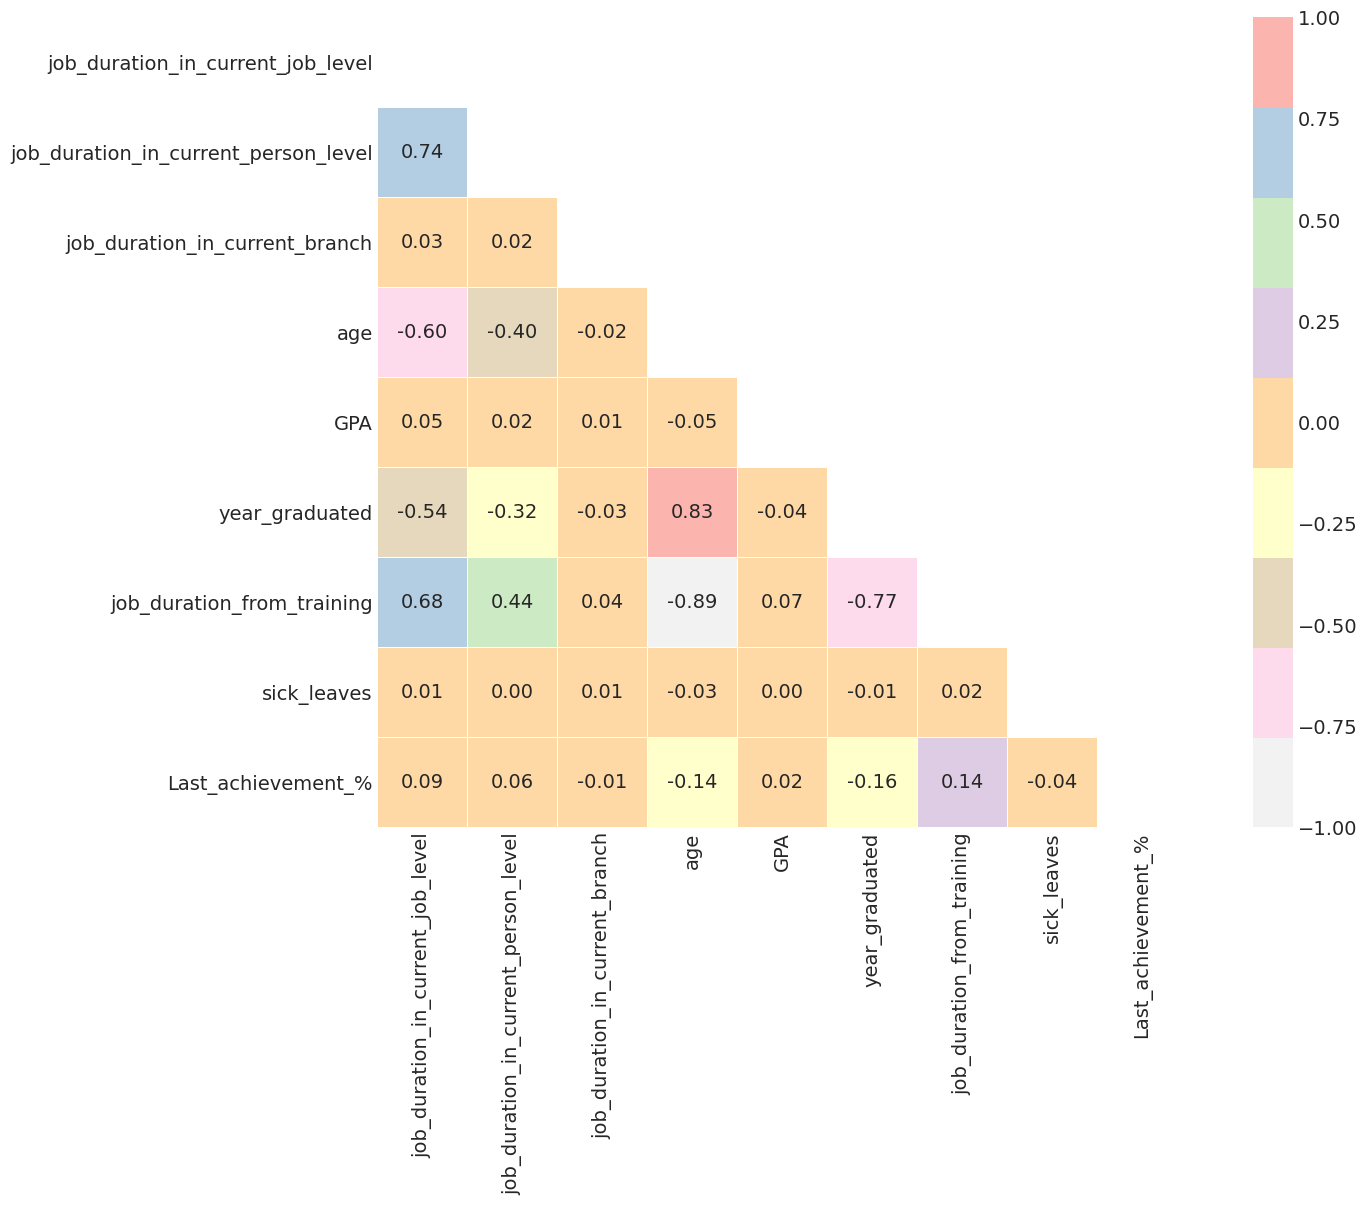

In [101]:
### Correlation of open, login, and checkout day with target
rcParams['figure.figsize'] = [15,10]
plt.style.use('fivethirtyeight') 
sns.set_style('whitegrid')

mask = np.zeros_like(train[continuous_f].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(train[continuous_f].corr(), square =True, vmin=-1, vmax=1, linewidths=0.1, annot=True, fmt='.2f', mask=mask, cmap='Pastel1_r')

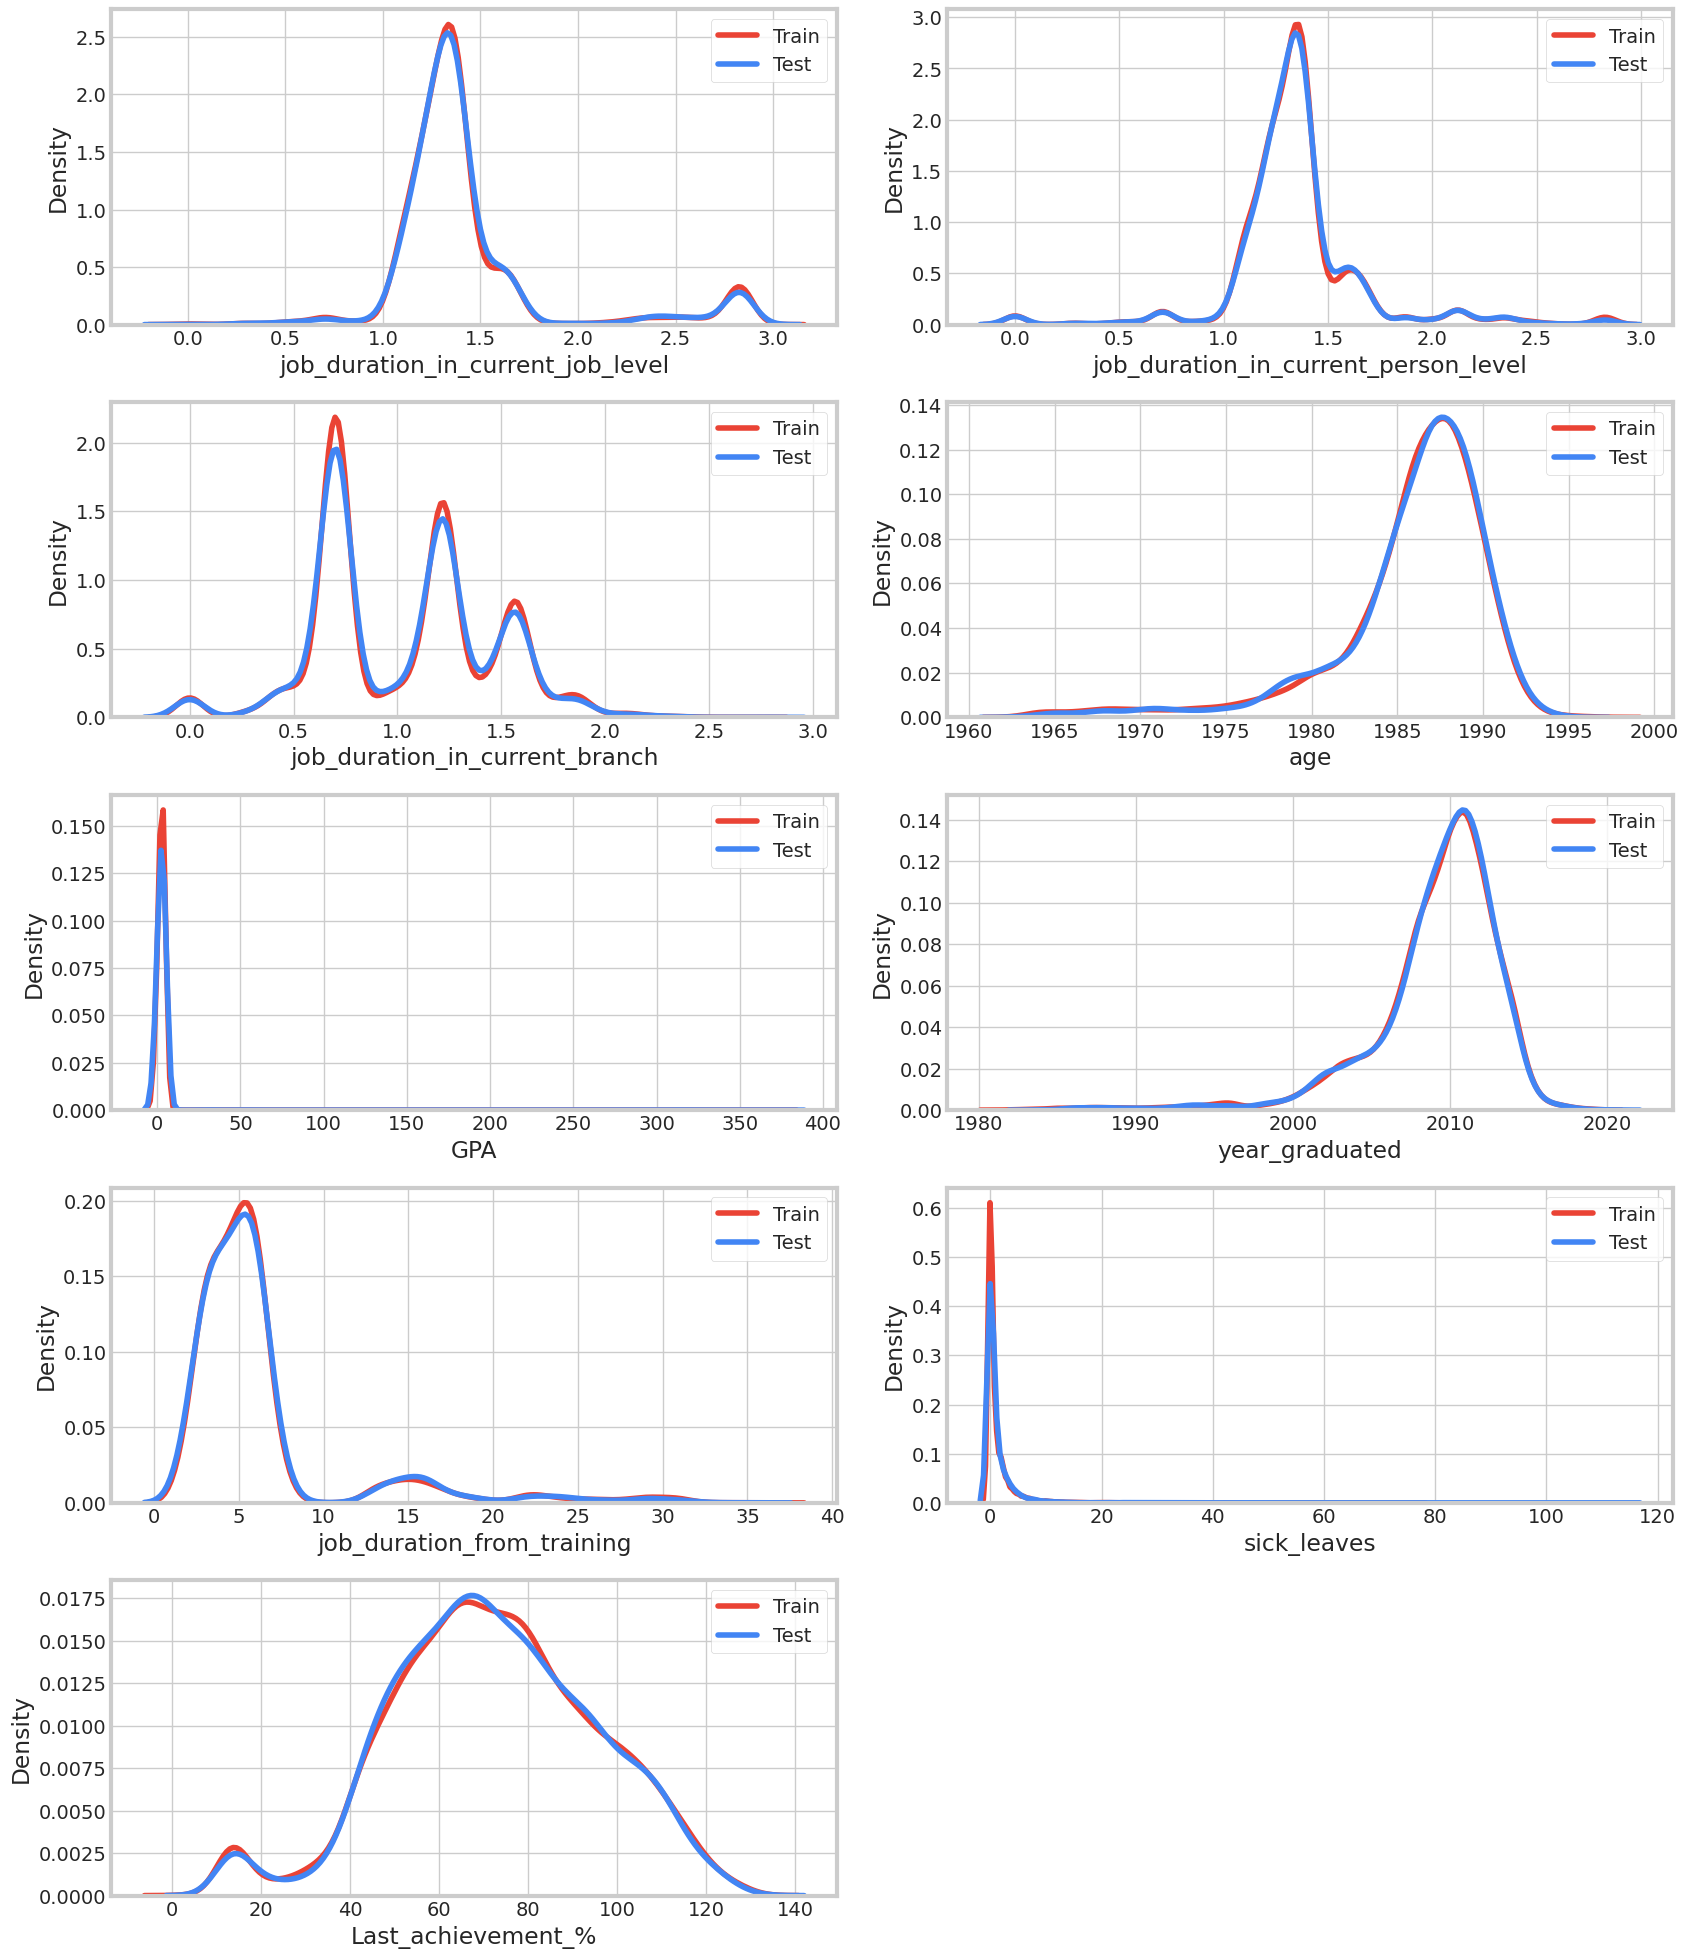

In [102]:
rcParams['figure.figsize']=[17,35]
grid = gridspec.GridSpec(len(continuous_f),2)


for i,var in enumerate(continuous_f):
  ax=plt.subplot(grid[i])
  sns.distplot(train[var], color='#EA4335',ax=ax, hist=False,)
  sns.distplot(test[var], color='#4285F4',ax=ax, hist=False,)
  plt.legend(['Train','Test'])
plt.tight_layout()

we can see that the year_graduated and age formats are still years. let's change it to the difference with 2020. 

- Age dan year_Graduated masih format tahun, convert dengan selisih 2020 - tahun
- GPA ada yang melebihi 4

### Age and Year Graduated

In [103]:
train['age'] = train['age'].apply(lambda x: 2020 - x)
test['age'] = test['age'].apply(lambda x: 2020 - x)

train['year_graduated'] = train['year_graduated'].apply(lambda x:2020 - x)
test['year_graduated'] = test['year_graduated'].apply(lambda x:2020 - x)

In [104]:
train[continuous_f].describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,GPA,year_graduated,job_duration_from_training,sick_leaves,Last_achievement_%
count,11152.000000,11152.000000,11152.000000,11152.000000,11152.000000,11152.00000,11152.000000,11152.000000,11152.000000
mean,1.433221,1.349223,1.034658,34.163379,3.176221,10.82613,6.278067,1.098906,72.234902
std,0.431103,0.324674,0.416740,4.632164,13.322284,4.11726,5.033764,2.711453,23.030421
min,0.000000,0.000000,0.000000,23.000000,0.000000,1.00000,2.000000,0.000000,4.510000
25%,1.224745,1.224745,0.707107,31.000000,2.820000,8.00000,4.000000,0.000000,56.650000
50%,1.352775,1.352775,1.118034,33.000000,3.070000,10.00000,5.000000,0.000000,71.675000
75%,1.414214,1.385641,1.224745,35.000000,3.270000,12.00000,6.000000,1.000000,88.172500
max,2.958040,2.828427,2.677686,57.000000,378.000000,38.00000,36.000000,77.000000,130.000000


In [105]:
len(train[train['GPA'] > 4])

52

### GPA

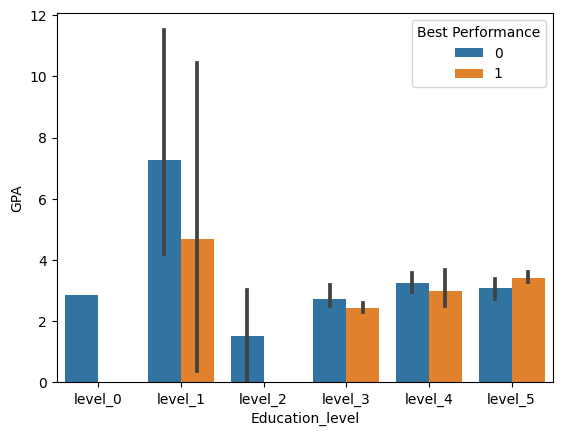

In [106]:
rcParams.update(mpl.rcParamsDefault)
sns.barplot(x='Education_level',y='GPA',data=train,hue='Best Performance')

Check mean of GPA for each education level

In [107]:
train[train['GPA'] <= 4].groupby('Education_level')['GPA'].mean()

Education_level
level_0    2.860000
level_1    0.091389
level_2    1.505000
level_3    2.528128
level_4    2.579444
level_5    3.139767
Name: GPA, dtype: float64

#order is level 1, level_2, level_3, level_4, level 0, level 5

In [108]:
train[train['GPA']>4].groupby('Education_level').count()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
Education_level,,,,,,,,,,,,,,,,,,,,,
level_1,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
level_3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
level_4,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19


In [109]:
train[train['GPA']==0].groupby('Education_level')['GPA'].count()

Education_level
level_1     105
level_2       2
level_3     321
level_4    1716
level_5       4
Name: GPA, dtype: int64

In [110]:
test[test['GPA']==0].groupby('Education_level').count()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
Education_level,,,,,,,,,,,,,,,,,,,,
level_1,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
level_2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
level_3,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
level_4,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930
level_5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [111]:
test[test['GPA']==0].groupby('Education_level').count()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
Education_level,,,,,,,,,,,,,,,,,,,,
level_1,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
level_2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
level_3,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175,175
level_4,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930,930
level_5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


#### level_0

In [112]:
train.loc[(train['Education_level']=='level_0') & (train['GPA']>4) | (train['GPA']==0),'GPA'] = train.loc[(train['Education_level']=='level_0') & (train['GPA']>4) | (train['GPA']==0),'GPA'].apply(lambda x: 2.86)
test.loc[(test['Education_level']=='level_0') & (test['GPA']>4) | (test['GPA']==0),'GPA'] = test.loc[(test['Education_level']=='level_0') & (test['GPA']>4) | (test['GPA']==0),'GPA'].apply(lambda x: 2.86)

#### level_1

In [113]:
train.loc[(train['Education_level']=='level_1') & ((train['GPA']>4) | (train['GPA']==0)),'GPA'] = train.loc[(train['Education_level']=='level_1') & ((train['GPA']>4)| (train['GPA']==0)),'GPA'].apply(lambda x: 0.09)
test.loc[(test['Education_level']=='level_1') & ((test['GPA']>4) | (test['GPA']==0)),'GPA'] = test.loc[(test['Education_level']=='level_1') & ((test['GPA']>4)| (test['GPA']==0)),'GPA'].apply(lambda x: 0.09)

#### level_2

In [114]:
train.loc[(train['Education_level']=='level_2') & ((train['GPA']>4) | (train['GPA']==0)),'GPA'] = train.loc[(train['Education_level']=='level_2') & ((train['GPA']>4)| (train['GPA']==0)),'GPA'].apply(lambda x: 1.505)
test.loc[(test['Education_level']=='level_2') & ((test['GPA']>4) | (test['GPA']==0)),'GPA'] = test.loc[(test['Education_level']=='level_2') & ((test['GPA']>4)| (test['GPA']==0)),'GPA'].apply(lambda x: 1.505)

#### level_3

In [115]:
train.loc[(train['Education_level']=='level_3') & ((train['GPA']>4) | (train['GPA']==0)),'GPA'] = train.loc[(train['Education_level']=='level_3') & ((train['GPA']>4)| (train['GPA']==0)),'GPA'].apply(lambda x: 2.52)
test.loc[(test['Education_level']=='level_3') & ((test['GPA']>4) | (test['GPA']==0)),'GPA'] = test.loc[(test['Education_level']=='level_3') & ((test['GPA']>4)| (test['GPA']==0)),'GPA'].apply(lambda x: 2.52)

#### level_4

In [116]:
train.loc[(train['Education_level']=='level_4') & ((train['GPA']>4) | (train['GPA']==0)),'GPA'] = train.loc[(train['Education_level']=='level_4') & ((train['GPA']>4)| (train['GPA']==0)),'GPA'].apply(lambda x: 2.57)
test.loc[(test['Education_level']=='level_4') & ((test['GPA']>4) | (test['GPA']==0)),'GPA'] = test.loc[(test['Education_level']=='level_4') & ((test['GPA']>4)| (test['GPA']==0)),'GPA'].apply(lambda x: 2.57)

#### level_5

In [117]:
train.loc[(train['Education_level']=='level_5') & ((train['GPA']>4) | (train['GPA']==0)),'GPA'] = train.loc[(train['Education_level']=='level_5') & ((train['GPA']>4)| (train['GPA']==0)),'GPA'].apply(lambda x: 3.13)
test.loc[(test['Education_level']=='level_5') & ((test['GPA']>4) | (test['GPA']==0)),'GPA'] = test.loc[(test['Education_level']=='level_5') & ((test['GPA']>4)| (test['GPA']==0)),'GPA'].apply(lambda x: 3.13)

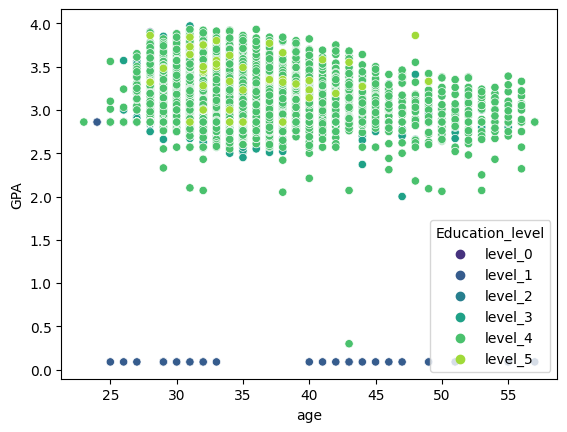

In [118]:
sns.scatterplot(x='age',y='GPA',data=train,hue='Education_level',palette='viridis')

In [119]:
test[test['GPA']>4].groupby('Education_level').count()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
Education_level,,,,,,,,,,,,,,,,,,,,


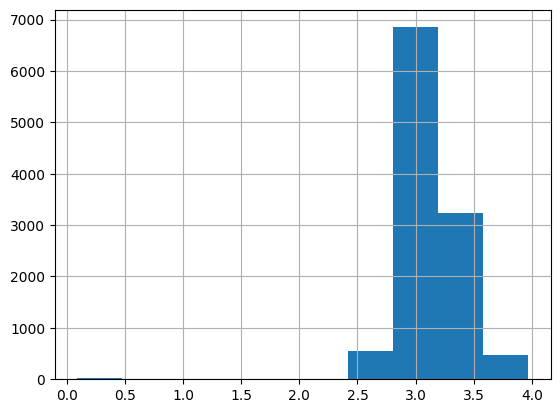

In [120]:
train['GPA'].hist()

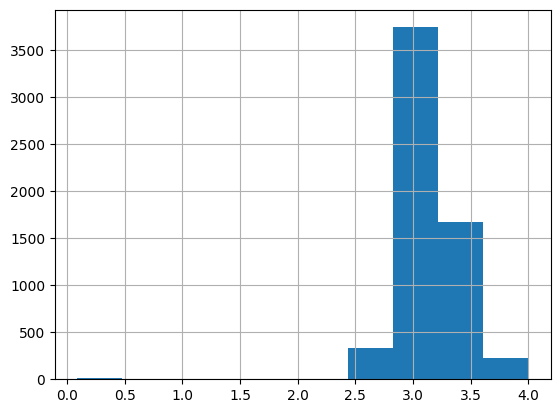

In [121]:
test['GPA'].hist()

# Convert Rare category in each categorical features

In [122]:
for feat in category_f:
  temp = train.groupby(feat)['Best Performance'].count()/len(train)
  temp_df = temp[temp>0.01].index
  train[feat] = np.where(train[feat].isin(temp_df),train[feat],'Rare_var')

In [123]:
jl = ['JG04','JG05']
pl = ['PG03','PG04','PG05','PG06']
el = ['level_1','level_3','level_4']
test['job_level']= test['job_level'].apply(lambda x: x if x in jl else 'Rare_var')
test['person_level']=test['person_level'].apply(lambda x:x if x in pl else 'Rare_var')
test['Education_level']=test['Education_level'].apply(lambda x:x if x in el else 'Rare_var')

# One Hot Encoding

In [124]:
train = pd.get_dummies(train,columns=['Employee_type'],drop_first=True)#.iloc[:,18:].columns
test = pd.get_dummies(test,columns=['Employee_type'],drop_first=True)#.iloc[:,18:].columns

In [125]:
# train['Education_level'] = train['Education_level'].map({
#     'level_1':0,
#     'level_2':1,
#     'level_3':2,
#     'level_4':3,
#     'level_0':4,
#     'level_5':5
# })

In [126]:
category_f = [f for f in category_f if f != 'Employee_type' ]
for f in category_f:
  train[f] = train[f].astype('category')
  train[f] = train[f].cat.codes
  test[f] = test[f].astype('category')
  test[f] = test[f].cat.codes

In [127]:
train[train['Education_level']=='level_1']['GPA'] = train[train['Education_level']=='level_1']['GPA'].apply(lambda x: 0)

# Logarithmic Transformation

In [128]:
# for feat in continuous_f:
#   if 0 not in train[feat].unique():
#     print(f'{feat} can be convert')

In [129]:
# for feat in numerical_f:
#   if 0 not in train[feat].unique():
#     print(f'{feat} can be convert')

In [130]:
# l = ['age','year_graduated','job_duration_from_training','Last_achievement_%','branch_rotation','job_rotation']
# for x in l:
#   train[x] = np.log(train[x])
#   test[x] = np.log(test[x])

# Modelling

## Install H2O library

In [131]:
!pip install h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 37 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_unknownUser_zzebsd
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.558 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Feature Selection

In [132]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
# The "accuracy" scoring is proportional to the number of correct classifications
x_train, y_train = train.drop('Best Performance',axis=1),train['Best Performance']

clf_rf_4 = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10,scoring='roc_auc')   #5-fold cross-validation
rfecv = rfecv.fit(x_train,y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 16
Best features : Index(['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'gender', 'age',
       'number_of_dependences', 'GPA', 'year_graduated',
       'job_duration_from_training', 'branch_rotation', 'job_rotation',
       'assign_of_otherposition', 'annual leave', 'sick_leaves',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal'],
      dtype='object')


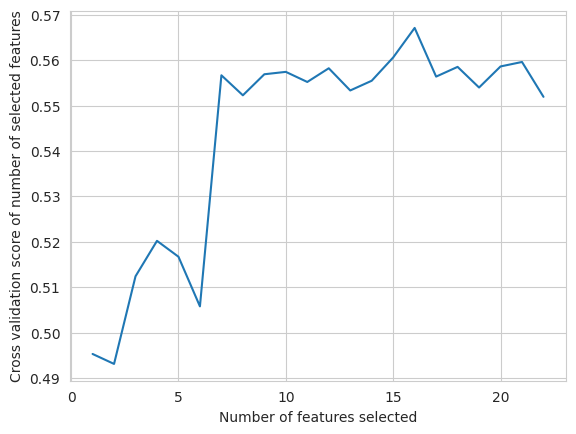

In [133]:
sns.set_style('whitegrid')
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Split train and validation data

In [134]:
X = [f for f in x_train.columns[rfecv.support_]]
Y = 'Best Performance'
list_col = X + [Y]

In [135]:
### Split dataframe
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train, stratify=train['Best Performance'], test_size = 0.2, random_state=11)

In [136]:
### Make H2O Frame
h2o_train = h2o.H2OFrame(train_data[list_col])
h2o_val = h2o.H2OFrame(val_data[list_col])
h2o_test = h2o.H2OFrame(test[X])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [137]:
### Make categorical
category_f = [f for f in category_f if f != "job_level" and f != "person_level" and f!="marital_status_maried(Y/N)" and f != "Education_level"]
# category_f = [f for f in category_f if f != 'Employee_type']
for var in category_f:
    h2o_train[var] = h2o_train[var].asfactor()
    h2o_val[var] = h2o_val[var].asfactor()
    h2o_test[var] = h2o_test[var].asfactor()
    
h2o_train[Y] = h2o_train[Y].asfactor()
h2o_val[Y] = h2o_val[Y].asfactor()

## Establish Baseline model performance

In [138]:
### Make all H2O baseline model
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import time

def h2o_compare_models(df_train, df_val, X, Y) :
    
    start = time.time()

    # Initialize all model (Ganti family/distributionnya)
    glm = H2OGeneralizedLinearEstimator(family='binomial', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    gbm = H2OGradientBoostingEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    xgb = H2OXGBoostEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    lgbm = H2OXGBoostEstimator(distribution='bernoulli', tree_method="hist", grow_policy="lossguide",
                              nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    rf = H2ORandomForestEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    ext = H2ORandomForestEstimator(distribution='bernoulli', histogram_type="Random",
                                  nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    
    # Train model
    glm.train(x=X, y=Y, training_frame=df_train,validation_frame=df_val)
    gbm.train(x=X, y=Y, training_frame=df_train,validation_frame=df_val)
    xgb.train(x=X, y=Y, training_frame=df_train,validation_frame=df_val)
    lgbm.train(x=X, y=Y, training_frame=df_train,validation_frame=df_val)
    rf.train(x=X, y=Y, training_frame=df_train,validation_frame=df_val)
    ext.train(x=X, y=Y, training_frame=df_train,validation_frame=df_val)
    
    # Calculate train metrics (Bisa diganti)
    from sklearn.metrics import roc_auc_score
    train_glm = roc_auc_score(h2o_train[Y].as_data_frame(), glm.predict(h2o_train)['predict'].as_data_frame())
    train_gbm = roc_auc_score(h2o_train[Y].as_data_frame(), gbm.predict(h2o_train)['predict'].as_data_frame())
    train_xgb = roc_auc_score(h2o_train[Y].as_data_frame(), xgb.predict(h2o_train)['predict'].as_data_frame())
    train_lgbm = roc_auc_score(h2o_train[Y].as_data_frame(), lgbm.predict(h2o_train)['predict'].as_data_frame())
    train_rf = roc_auc_score(h2o_train[Y].as_data_frame(), rf.predict(h2o_train)['predict'].as_data_frame())
    train_ext = roc_auc_score(h2o_train[Y].as_data_frame(), ext.predict(h2o_train)['predict'].as_data_frame())

    # Calculate CV metrics for all model (Bisa diganti)
    met_glm = roc_auc_score(h2o_train[Y].as_data_frame(), glm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_gbm = roc_auc_score(h2o_train[Y].as_data_frame(), gbm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_xgb = roc_auc_score(h2o_train[Y].as_data_frame(), xgb.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_lgbm = roc_auc_score(h2o_train[Y].as_data_frame(), lgbm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_rf = roc_auc_score(h2o_train[Y].as_data_frame(), rf.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_ext = roc_auc_score(h2o_train[Y].as_data_frame(), ext.cross_validation_holdout_predictions()['predict'].as_data_frame())
    
    # Calculate holdout metrics
    from sklearn.metrics import roc_auc_score
    hold_glm = roc_auc_score(h2o_val[Y].as_data_frame(), glm.predict(h2o_val)['predict'].as_data_frame())
    hold_gbm = roc_auc_score(h2o_val[Y].as_data_frame(), gbm.predict(h2o_val)['predict'].as_data_frame())
    hold_xgb = roc_auc_score(h2o_val[Y].as_data_frame(), xgb.predict(h2o_val)['predict'].as_data_frame())
    hold_lgbm = roc_auc_score(h2o_val[Y].as_data_frame(), lgbm.predict(h2o_val)['predict'].as_data_frame())
    hold_rf = roc_auc_score(h2o_val[Y].as_data_frame(), rf.predict(h2o_val)['predict'].as_data_frame())
    hold_ext = roc_auc_score(h2o_val[Y].as_data_frame(), ext.predict(h2o_val)['predict'].as_data_frame())
    
    # Make result dataframe
    result = pd.DataFrame({'Model':['GLM','GBM','XGB','LGBM','RF','ExtraTree'],
                          'Train Metrics':[train_glm,train_gbm,train_xgb,train_lgbm,train_rf,train_ext],
                          'CV Metrics':[met_glm,met_gbm,met_xgb,met_lgbm,met_rf,met_ext],
                          'Holdout Metrics':[hold_glm,hold_gbm,hold_xgb,hold_lgbm,hold_rf,hold_ext]})
    
    end = time.time()
    print('Time Used :',(end-start)/60)
    
    return result.sort_values('Holdout Metrics')

## Compare Models

In [139]:
### Compare models
res = h2o_compare_models(h2o_train, h2o_val, X, Y) 
res

glm Model Build progress: |███████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |██

,Model,Train Metrics,CV Metrics,Holdout Metrics
3,LGBM,0.609972,0.563880,0.517590
0,GLM,0.518436,0.523121,0.531986
1,GBM,0.585530,0.566032,0.540928
5,ExtraTree,0.881709,0.554702,0.556332
2,XGB,0.808167,0.557523,0.557902
4,RF,0.966430,0.554400,0.561778


XGBoost Has the highest CV Metrics score, so we use LGBM Model

# RF Model

In [ ]:
from h2o.grid.grid_search import H2OGridSearch
## Depth 10 is usually plenty of depth for most datasets, but you never know
hyper_params = {'max_depth' : list(range(1,30,2))}
#hyper_params = {max_depth = [4,6,8,12,16,20]} ##faster for larger datasets

#Build initial GBM Model
rf_grid = H2ORandomForestEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## smaller learning rate is better
        ## since we have learning_rate_annealing, we can afford to start with a 
        #bigger learning rate
        # learn_rate=0.05,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        # learn_rate_annealing = 0.99,
        ## sample 80% of rows per tree
        sample_rate = 0.8,
        ## sample 80% of columns per split
        # col_sample_rate = 0.8,
        ## fix a random number generator seed for reproducibility
        seed = 1234,
        ## score every 10 trees to make early stopping reproducible 
        #(it depends on the scoring interval)
        score_tree_interval = 10, 
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 5,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4)

#Build grid search with previously made GBM and hyper parameters
grid = H2OGridSearch(rf_grid,hyper_params,
                         grid_id = 'depth_grid',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
grid.train(x=X, 
           y=Y,
           training_frame = h2o_train,
           validation_frame = h2o_val)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
## sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

In [ ]:
max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:5]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print("MaxDepth", new_max)
print("MinDepth", new_min)

In [ ]:
# create hyperameter and search criteria lists (ranges are inclusive..exclusive))
hyper_params_tune = {'max_depth' : list(range(new_min,new_max+1,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                # 'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(len(train),2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}
search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3
                   }

# XGB Model

In [ ]:
### Search max depth
import time
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch

start = time.time()
xgb = H2OXGBoostEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')

hyper_params = {'max_depth' : list(range(1,30,2))}
#Build grid search with previously made GBM and hyper parameters
grid = H2OGridSearch(xgb,hyper_params,
                         grid_id = 'depth_grid',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
grid.train(x=X, 
           y=Y,
           training_frame = h2o_train,
           validation_frame = h2o_val)

end = time.time()
print('Time Used :',(end-start)/60)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%
Time Used : 8.10696671406428


In [ ]:
## sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

     max_depth            model_ids                 auc
0            1   depth_grid_model_1  0.5766602877915753
1            3   depth_grid_model_2  0.5703595940387607
2           17   depth_grid_model_9  0.5692337125554516
3           15   depth_grid_model_8  0.5655062329432792
4           13   depth_grid_model_7   0.564193097375133
5            5   depth_grid_model_3  0.5631998082325602
6           29  depth_grid_model_15  0.5628025828426313
7           21  depth_grid_model_11   0.562541660774231
8           11   depth_grid_model_6  0.5623437250825192
9            7   depth_grid_model_4  0.5609128410968054
10          25  depth_grid_model_13  0.5596016111674444
11          19  depth_grid_model_10  0.5588087651360375
12          23  depth_grid_model_12  0.5584434842699548
13          27  depth_grid_model_14  0.5582381266166587
14           9   depth_grid_model_5  0.5552344387041256



In [ ]:
max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:5]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print("MaxDepth", new_max)
print("MinDepth", new_min)

MaxDepth 17
MinDepth 1


In [ ]:
import math
# create hyperameter and search criteria lists (ranges are inclusive..exclusive))
hyper_params_tune = {
                'max_depth' : list(range(new_min,new_max+1,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                # 'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(len(train),2)-1)+1)],
                # 'nbins': [2**x for x in range(4,11)],
                # 'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                # 'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]
                }
search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3
                   }

In [ ]:
xgb_final_grid = H2OXGBoostEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
            
#Build grid search with previously made GBM and hyper parameters
final_grid = H2OGridSearch(xgb_final_grid, hyper_params = hyper_params_tune,
                                    grid_id = 'final_grid',
                                    search_criteria = search_criteria_tune)
#Train grid search
final_grid.train(x=X, 
           y=Y,
           ## early stopping based on timeout (no model should take more than 1 hour - modify as needed)
           max_runtime_secs = 3600, 
           training_frame = h2o_train,
           validation_frame = h2o_val)

print(final_grid)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%
      col_sample_rate  ...            model_ids              logloss
0                0.87  ...  final_grid_model_61   0.4144119392401629
1                0.58  ...  final_grid_model_15  0.41441194173065693
2                0.72  ...  final_grid_model_72   0.4146608820725834
3                0.49  ...  final_grid_model_55  0.41486793939766536
4                0.69  ...  final_grid_model_98   0.4149414317954427
.. ..             ...  ...                  ...                  ...
95               0.82  ...  final_grid_model_60    0.497745958143919
96               0.73  ...  final_grid_model_13   0.4982432224955944
97               0.74  ...  final_grid_model_44   0.5052496908352818
98               0.82  ...  final_grid_model_26   0.5061990526505012
99               0.93  ...  final_grid_model_33   0.5450059905081869

[100 rows x 9 columns]



In [ ]:
## Sort the grid models by AUC
sorted_final_grid = final_grid.get_grid(sort_by='auc',decreasing=True)

print(sorted_final_grid)

      col_sample_rate  ...            model_ids                  auc
0                0.81  ...  final_grid_model_73   0.5742307989340458
1                0.71  ...  final_grid_model_63   0.5740692208244195
2                0.71  ...  final_grid_model_64   0.5703279002568601
3                0.61  ...  final_grid_model_28    0.569491675868896
4                0.84  ...  final_grid_model_41   0.5674530937042709
.. ..             ...  ...                  ...                  ...
95               0.37  ...  final_grid_model_29  0.47231909219380147
96               0.72  ...  final_grid_model_82   0.4720390635891603
97               0.83  ...   final_grid_model_3  0.47196123328930306
98               0.62  ...  final_grid_model_62   0.4719495988630357
99               0.84  ...  final_grid_model_10     0.47151390965868

[100 rows x 9 columns]



In [ ]:
#Get the best model from the list (the model name listed at the top of the table)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(h2o_val)
print(performance_best_model.auc())

0.5592017770410916


In [ ]:
params_list = []
for key, value in best_model.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'final_grid_model_73', 'type': 'Key<Model>', 'URL': '/3/Models/final_grid_model_73'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_1_sid_8020', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_1_sid_8020'}",
 "validation_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_2_sid_8020', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_2_sid_8020'}",
 'nfolds = 10',
 'keep_cross_validation_models = True',
 'keep_cross_validation_predictions = True',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'fold_assignment = Modulo',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'Best Performance', 'is_member_of_frames'

In [ ]:
xgb = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
#get the parameters from the Random grid search model and modify them slightly
params = xgb.params
new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
for key in new_params.keys():
    params[key]['actual'] = new_params[key] 
xgb_best = H2OXGBoostEstimator()
for key in params.keys():
    if key in dir(xgb_best) and getattr(xgb_best,key) != params[key]['actual']:
        setattr(xgb_best,key,params[key]['actual'])

In [ ]:
xgb_best.train(x=X, y=Y, training_frame=h2o_train,validation_frame=h2o_val)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [ ]:
print(xgb_best.cross_validation_metrics_summary())


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.3746212,0.111202754,0.3787115,0.43890134,0.36098656,0.49495515,0.19955157
1,auc,0.5665448,0.027201695,0.54834133,0.5917075,0.56709886,0.59414625,0.53142995
2,aucpr,0.18779966,0.0113006085,0.17855997,0.20152847,0.18973173,0.1948996,0.17427853
3,err,0.6253788,0.111202754,0.62128854,0.56109864,0.63901347,0.5050448,0.8004484
4,err_count,1115.8,198.38019,1109.0,1001.0,1140.0,901.0,1428.0
5,f0point5,0.19637695,0.013889916,0.19223449,0.20954962,0.19051108,0.21125117,0.17833841
6,f1,0.27275386,0.013383194,0.26701915,0.28652886,0.2673522,0.28661916,0.25625
7,f2,0.4477346,0.0070594028,0.43704024,0.45290673,0.44808272,0.4455933,0.45504993
8,lift_top_group,1.7487813,0.46666762,1.8640351,1.0931373,2.3320262,1.9357638,1.5189443
9,logloss,0.41782355,0.009920353,0.42722654,0.42202023,0.40922934,0.40528992,0.42535168



See the whole table with table.as_data_frame()



In [ ]:
for i in range(5): 
    xgb = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][i])
    #get the parameters from the Random grid search model and modify them slightly
    params = xgb.params
    new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
    for key in new_params.keys():
        params[key]['actual'] = new_params[key]
    new_model = H2OXGBoostEstimator()
    for key in params.keys():
        if key in dir(new_model) and getattr(new_model,key) != params[key]['actual']:
            setattr(new_model,key,params[key]['actual'])
    new_model.train(x = X, y = Y, training_frame = h2o_train, validation_frame=h2o_val)  
    cv_summary = new_model.cross_validation_metrics_summary().as_data_frame()
    print(xgb.model_id)
    print(cv_summary.iloc[1]) ## AUC

xgboost Model Build progress: |███████████████████████████████████████████| 100%
final_grid_model_73
                      auc
mean            0.5665448
sd            0.027201695
cv_1_valid     0.54834133
cv_2_valid      0.5917075
cv_3_valid     0.56709886
cv_4_valid     0.59414625
cv_5_valid     0.53142995
Name: 1, dtype: object
xgboost Model Build progress: |███████████████████████████████████████████| 100%
final_grid_model_63
                      auc
mean            0.5644212
sd            0.034792986
cv_1_valid      0.5648082
cv_2_valid     0.58219296
cv_3_valid      0.5531015
cv_4_valid      0.6077708
cv_5_valid      0.5142326
Name: 1, dtype: object
xgboost Model Build progress: |███████████████████████████████████████████| 100%
final_grid_model_64
                     auc
mean           0.5776284
sd            0.03066794
cv_1_valid      0.559226
cv_2_valid     0.5807255
cv_3_valid    0.60045654
cv_4_valid     0.6117116
cv_5_valid    0.53602237
Name: 1, dtype: object
xgboost Mode

#LGBM Model

In [70]:
### Search max depth
import time
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch

start = time.time()
lgbm = H2OXGBoostEstimator(distribution='bernoulli', tree_method="hist", grow_policy="lossguide",
                           nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo',
                           ntrees=100, learn_rate=0.05,
                           sample_rate = 0.8, col_sample_rate = 0.8, seed=11, score_tree_interval = 10,
                           stopping_rounds = 5, stopping_metric = "AUC", stopping_tolerance = 1e-4)

# LGBM Params
lgbm_params = {'max_depth' : [3,5,7,9,11,13,15]}

# Search criteria
search_criteria = {'strategy': "Cartesian"}

# Make grid model
lgbm_grid = H2OGridSearch(model=lgbm,
                          grid_id='best_lgbm_max_depths',
                          hyper_params=lgbm_params,
                          search_criteria=search_criteria)

# Train model
lgbm_grid.train(x=X, y=Y, training_frame=h2o_train, validation_frame=h2o_val)

# Get best GLM
lgbm_res = lgbm_grid.get_grid(sort_by='auc', decreasing=True)
print(lgbm_res)

end = time.time()
print('Time Used :',(end-start)/60)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%
    max_depth                     model_ids                 auc
0           7  best_lgbm_max_depths_model_3  0.5864747287222893
1           3  best_lgbm_max_depths_model_1  0.5820364458432501
2           5  best_lgbm_max_depths_model_2  0.5804864092850746
3           9  best_lgbm_max_depths_model_4  0.5801839643505132
4          11  best_lgbm_max_depths_model_5  0.5798761535383199
5          13  best_lgbm_max_depths_model_6   0.576233274258531
6          15  best_lgbm_max_depths_model_7  0.5751863764880281

Time Used : 3.5813730716705323


In [71]:
### Tune Model - LGBM - RandomGridSearch
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn.metrics import log_loss
start = time.time()
lgbm = H2OXGBoostEstimator(distribution='bernoulli', tree_method="hist", grow_policy="lossguide",
                           nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo',
                           ntrees=100, seed=11, score_tree_interval = 10,
                           stopping_rounds = 5, stopping_metric = "AUC", stopping_tolerance = 1e-4)

# LGBM Params
lgbm_params = {'max_depth' : [7,5,3,9,11],
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
              'reg_lambda':list(np.arange(0.5,1.05,0.05)),
              'reg_alpha':list(np.arange(0.01,0.11,0.01)),
             'learn_rate':list(np.arange(0.01,0.11,0.01)),
             'booster':['dart','gbtree']}

# Search criteria
search_criteria = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 20,  ## build no more than 100 models
                   'seed' : 11,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "auc",
                   'stopping_tolerance': 1e-3
                   }

# Make grid model
lgbm_grid = H2OGridSearch(model=lgbm,
                          grid_id='best_lgbm_cmon',
                          hyper_params=lgbm_params,
                          search_criteria=search_criteria)

# Train model
lgbm_grid.train(x=X, y=Y, training_frame=h2o_train, validation_frame=h2o_val)

# Get best GLM
lgbm_res = lgbm_grid.get_grid(sort_by='auc', decreasing=True)
best_lgbm = lgbm_res.models[0]

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [72]:
h2o_train

job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,annual leave,Last_achievement_%,Best Performance
2.82843,2.82843,0.707107,51,2.86,33,30,9,5,10,76.49,0
1.38564,1.38564,1.11803,29,3.01,7,4,2,3,4,80.47,1
1.38564,1.38564,1.55563,32,3.33,9,5,2,3,4,79.08,0
1.19164,1.19164,0.648074,32,2.86,6,3,3,3,1,13.82,0
2.82843,2.12132,1.58114,38,3.34,16,13,6,6,2,88.65,0
1.19164,1.19164,0.707107,32,3.24,9,4,3,3,8,47.05,0
1.15326,1.15326,1.22474,38,2.86,9,6,5,2,4,73.73,0
1.25698,1.25698,1.22474,36,2.86,14,7,5,4,0,88.92,0
1.35277,1.35277,1.5,29,3.59,7,3,2,3,4,50.35,0
2.64575,1.87083,1.73205,37,2.97,15,7,3,3,3,42.72,0


In [73]:
# Hitung metrics
from sklearn.metrics import roc_auc_score
train_lgbm = roc_auc_score(h2o_train[Y].as_data_frame(), best_lgbm.predict(h2o_train)['predict'].as_data_frame())
met_lgbm = roc_auc_score(h2o_train[Y].as_data_frame(), best_lgbm.cross_validation_holdout_predictions()['predict'].as_data_frame())
hold_lgbm = roc_auc_score(h2o_val[Y].as_data_frame(), best_lgbm.predict(h2o_val)['predict'].as_data_frame())

# Print result
print('Train metrics :',train_lgbm)
print('CV metrics :',met_lgbm)
print('Holdout metrics :',hold_lgbm)

end = time.time()
print('Time Used :',(end-start)/60)

xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
Train metrics : 0.5677710846394481
CV metrics : 0.5779084811958586
Holdout metrics : 0.5261585138642613
Time Used : 12.210725231965382


# GBM Model

## Hyper Parameter Search

In [141]:
from h2o.grid.grid_search import H2OGridSearch
## Depth 10 is usually plenty of depth for most datasets, but you never know
hyper_params = {'max_depth' : list(range(1,30,2))}
#hyper_params = {max_depth = [4,6,8,12,16,20]} ##faster for larger datasets

#Build initial GBM Model
gbm_grid = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## smaller learning rate is better
        ## since we have learning_rate_annealing, we can afford to start with a 
        #bigger learning rate
        learn_rate=0.05,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## sample 80% of rows per tree
        sample_rate = 0.8,
        ## sample 80% of columns per split
        col_sample_rate = 0.8,
        ## fix a random number generator seed for reproducibility
        seed = 1234,
        ## score every 10 trees to make early stopping reproducible 
        #(it depends on the scoring interval)
        score_tree_interval = 10, 
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 5,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4)

#Build grid search with previously made GBM and hyper parameters
grid = H2OGridSearch(gbm_grid,hyper_params,
                         grid_id = 'depth_grid_2',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
grid.train(x=X, 
           y=Y,
           training_frame = h2o_train,
           validation_frame = h2o_val)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [142]:
## sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

     max_depth              model_ids                 auc
0           25  depth_grid_2_model_13  0.5833815177447126
1           15   depth_grid_2_model_8  0.5786899622234215
2           21  depth_grid_2_model_11  0.5780442911109398
3           27  depth_grid_2_model_14  0.5771681378973608
4            7   depth_grid_2_model_4  0.5764461748001952
5           29  depth_grid_2_model_15  0.5728564361524426
6           19  depth_grid_2_model_10  0.5719433415568063
7           17   depth_grid_2_model_9  0.5702625086731941
8            5   depth_grid_2_model_3  0.5671473864775267
9            3   depth_grid_2_model_2  0.5662198365584765
10          23  depth_grid_2_model_12  0.5657548569886671
11          11   depth_grid_2_model_6  0.5640780394726698
12           9   depth_grid_2_model_5   0.563564072417958
13          13   depth_grid_2_model_7  0.5591351219386838
14           1   depth_grid_2_model_1  0.5564713270629352



In [143]:
max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:5]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print("MaxDepth", new_max)
print("MinDepth", new_min)

MaxDepth 27
MinDepth 7


In [144]:
import math

In [145]:
# create hyperameter and search criteria lists (ranges are inclusive..exclusive))
hyper_params_tune = {'max_depth' : list(range(new_min,new_max+1,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(len(train),2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}
search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3
                   }

In [147]:
gbm_final_grid = H2OGradientBoostingEstimator(distribution='bernoulli',
                    ## more trees is better if the learning rate is small enough 
                    ## here, use "more than enough" trees - we have early stopping
                    ntrees=10000,
                    ## smaller learning rate is better
                    ## since we have learning_rate_annealing, we can afford to start with a 
                    #bigger learning rate
                    learn_rate=0.05,
                    ## learning rate annealing: learning_rate shrinks by 1% after every tree 
                    ## (use 1.00 to disable, but then lower the learning_rate)
                    learn_rate_annealing = 0.99,
                    ## score every 10 trees to make early stopping reproducible 
                    #(it depends on the scoring interval)
                    score_tree_interval = 10,
                    ## fix a random number generator seed for reproducibility
                    seed = 1234,
                    ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
                    #5 consecutive scoring events
                    stopping_rounds = 5,
                    stopping_metric = "AUC",
                    stopping_tolerance = 1e-4)
            
#Build grid search with previously made GBM and hyper parameters
final_grid = H2OGridSearch(gbm_final_grid, hyper_params = hyper_params_tune,
                                    grid_id = 'final_grid_2',
                                    search_criteria = search_criteria_tune)
#Train grid search
final_grid.train(x=X, 
           y=Y,
           ## early stopping based on timeout (no model should take more than 1 hour - modify as needed)
           max_runtime_secs = 3600, 
           training_frame = h2o_train,
           validation_frame = h2o_val)

print(final_grid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
      col_sample_rate  ...              model_ids              logloss
0                0.85  ...  final_grid_2_model_98   0.4094121019596198
1                0.27  ...   final_grid_2_model_2   0.4102679183949642
2                0.42  ...  final_grid_2_model_56   0.4105270787729817
3                0.44  ...  final_grid_2_model_10   0.4106132554289815
4                0.87  ...  final_grid_2_model_25  0.41069468854127134
.. ..             ...  ...                    ...                  ...
95               0.45  ...  final_grid_2_model_31  0.48668162662948417
96               0.96  ...  final_grid_2_model_65   0.5020934550249475
97               0.66  ...  final_grid_2_model_51   0.5098640428851868
98                0.5  ...   final_grid_2_model_4    0.533815769014412
99               0.92  ...  final_grid_2_model_49   0.6184749884567603

[100 rows x 13 columns]



In [148]:
## Sort the grid models by AUC
sorted_final_grid = final_grid.get_grid(sort_by='auc',decreasing=True)

print(sorted_final_grid)

      col_sample_rate  ...              model_ids                 auc
0                0.85  ...  final_grid_2_model_98  0.5906959113920798
1                0.27  ...   final_grid_2_model_2  0.5878040436358029
2                0.51  ...  final_grid_2_model_26  0.5832056446431784
3                0.42  ...  final_grid_2_model_56  0.5831381864672475
4                0.44  ...  final_grid_2_model_10  0.5825246382956852
.. ..             ...  ...                    ...                 ...
95               0.88  ...  final_grid_2_model_32  0.5330986752499165
96               0.87  ...  final_grid_2_model_52  0.5328930884280317
97               0.45  ...  final_grid_2_model_93  0.5304123943155243
98                0.4  ...  final_grid_2_model_16  0.5278819096445918
99               0.22  ...  final_grid_2_model_62  0.5198784789145016

[100 rows x 13 columns]



## Model Inspection and Final Test Set Scoring

In [149]:
#Get the best model from the list (the model name listed at the top of the table)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(h2o_val)
print(performance_best_model.auc())

0.5906959113920798


In [150]:
params_list = []
for key, value in best_model.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

["model_id = {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'final_grid_2_model_98', 'type': 'Key<Model>', 'URL': '/3/Models/final_grid_2_model_98'}",
 "training_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_39_sid_a2f5', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_39_sid_a2f5'}",
 "validation_frame = {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_40_sid_a2f5', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_40_sid_a2f5'}",
 'nfolds = 0',
 'keep_cross_validation_models = True',
 'keep_cross_validation_predictions = False',
 'keep_cross_validation_fold_assignment = False',
 'score_each_iteration = False',
 'score_tree_interval = 10',
 'fold_assignment = None',
 'fold_column = None',
 "response_column = {'__meta': {'schema_version': 3, 'schema_name': 'ColSpecifierV3', 'schema_type': 'VecSpecifier'}, 'column_name': 'Best 

In [151]:
gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
#get the parameters from the Random grid search model and modify them slightly
params = gbm.params
new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
for key in new_params.keys():
    params[key]['actual'] = new_params[key] 
gbm_best = H2OGradientBoostingEstimator()
for key in params.keys():
    if key in dir(gbm_best) and getattr(gbm_best,key) != params[key]['actual']:
        setattr(gbm_best,key,params[key]['actual'])

In [152]:
gbm_best.train(x=X, y=Y, training_frame=h2o_train,validation_frame=h2o_val)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [153]:
print(gbm_best.cross_validation_metrics_summary())


Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.48696804,0.113514274,0.4256608,0.5835165,0.31601968,0.55870897,0.5509343
1,auc,0.5820555,0.022742521,0.5888828,0.5992914,0.55733484,0.60598373,0.55878466
2,aucpr,0.19869636,0.024745423,0.19390817,0.21570525,0.18900207,0.22937016,0.16549616
3,err,0.51303196,0.113514274,0.5743392,0.41648352,0.68398035,0.44129103,0.44906572
4,err_count,918.0,222.29935,1043.0,758.0,1251.0,793.0,745.0
5,f0point5,0.20998415,0.02192313,0.19651093,0.22009847,0.18428548,0.24118738,0.20783848
6,f1,0.2814803,0.020682344,0.27317074,0.28625235,0.26020107,0.31460676,0.27317074
7,f2,0.43006608,0.02449944,0.4478976,0.40926224,0.44247788,0.45228627,0.3984064
8,lift_top_group,2.1162164,0.8478077,1.9039631,2.1688182,2.9060576,2.802339,0.7999036
9,logloss,0.41376972,0.012872328,0.39607412,0.40676045,0.41543034,0.4293072,0.4212765



See the whole table with table.as_data_frame()



In [154]:
for i in range(5): 
    gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][i])
    #get the parameters from the Random grid search model and modify them slightly
    params = gbm.params
    new_params = {"nfolds":5, "model_id":None, "training_frame":None, "validation_frame":None, 
              "response_column":None, "ignored_columns":None}
    for key in new_params.keys():
        params[key]['actual'] = new_params[key]
    new_model = H2OGradientBoostingEstimator()
    for key in params.keys():
        if key in dir(new_model) and getattr(new_model,key) != params[key]['actual']:
            setattr(new_model,key,params[key]['actual'])
    new_model.train(x = X, y = Y, training_frame = h2o_train, validation_frame=h2o_val)  
    cv_summary = new_model.cross_validation_metrics_summary().as_data_frame()
    print(gbm.model_id)
    print(cv_summary.iloc[1]) ## AUC

gbm Model Build progress: |███████████████████████████████████████████████| 100%
final_grid_2_model_98
                      auc
mean            0.5820555
sd            0.022742521
cv_1_valid      0.5888828
cv_2_valid      0.5992914
cv_3_valid     0.55733484
cv_4_valid     0.60598373
cv_5_valid     0.55878466
Name: 1, dtype: object
gbm Model Build progress: |███████████████████████████████████████████████| 100%
final_grid_2_model_2
                     auc
mean          0.57341397
sd            0.02263743
cv_1_valid     0.5882769
cv_2_valid    0.57966024
cv_3_valid    0.54836416
cv_4_valid     0.5994117
cv_5_valid      0.551357
Name: 1, dtype: object
gbm Model Build progress: |███████████████████████████████████████████████| 100%
final_grid_2_model_26
                      auc
mean            0.5823972
sd            0.026313039
cv_1_valid      0.6000776
cv_2_valid      0.5987951
cv_3_valid        0.56632
cv_4_valid     0.60312474
cv_5_valid     0.54366857
Name: 1, dtype: object
gbm Mod

# Export predict result

In [156]:
preds = best_model.predict(h2o_test)['p1'].as_data_frame()
preds.rename(columns={'p1':'Best Performance'}).to_csv('hyperparam_tuning_h2o_gbm_gridsearch.csv')

gbm prediction progress: |████████████████████████████████████████████████| 100%
